# 1. linear_regression

In [1]:
import matplotlib.pyplot as plt

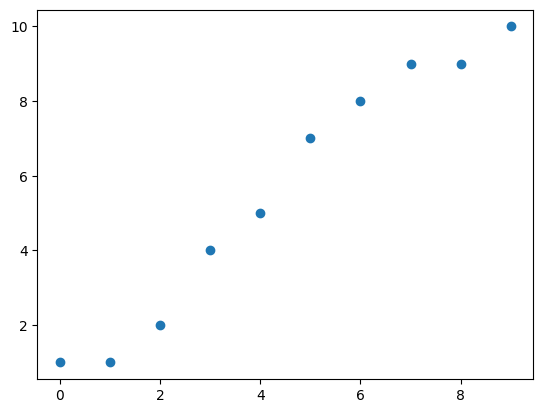

In [2]:
x = [i for i in range(10)]
y = [1, 1, 2, 4, 5, 7, 8, 9, 9, 10]

plt.scatter(x, y)
plt.show()

In [3]:
# Hypothesis
class H():
    def __init__(self, w):
        self.w = w
    
    def forward(self, x):
        return self.w * x

h = H(4)
print(h.forward(5))

20


In [4]:
# Cost Function
def cost(h, x, y):
    error = 0
    for i in range(len(x)):
        error += (h.forward(x[i]) - y[i]) ** 2
    error /= len(x)
    return error

h = H(4)
print(cost(h, x, y))

def better_cost(pred, true):
    error = 0
    for i in range(len(x)):
        error += (true[i] - pred[i]) ** 2
    return error/len(x)

pred = [h.forward(i) for i in x]
print(better_cost(pred, y))

222.2
222.2


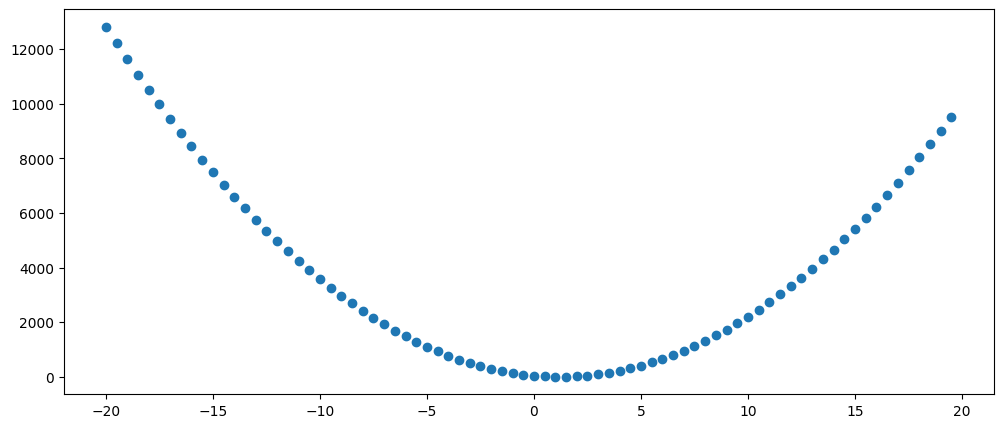

In [5]:
# Cost visualization
list_c, list_w = [], []
for i in range(-40, 40):
    w = i*0.5
    h = H(w)
    c = cost(h, x, y)
    list_w.append(w)
    list_c.append(c)

plt.figure(figsize=(12, 5))
plt.scatter(list_w, list_c)
plt.show()

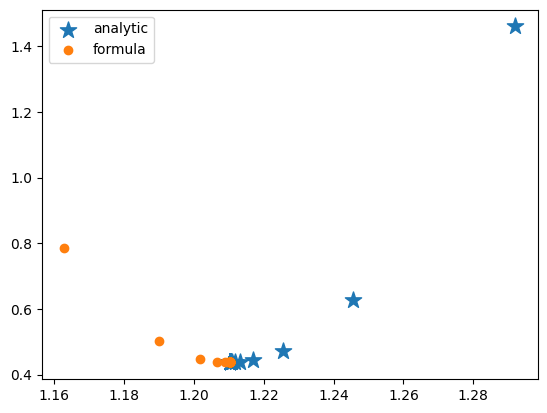

In [6]:
# Gradient Descent

def cal_grad(w):
    eps = .0001
    h = H(w)
    cost1 = cost(h, x, y)
    h = H(w + eps)
    cost2 = cost(h, x, y)
    dcost = cost2 - cost1
    dw = eps
    grad = dcost / dw
    return grad, (cost1 + cost2)/2

def cal_grad2(w):
    h = H(w)
    grad = 0
    for i in range(len(x)):
        grad += 2 * (h.forward(x[i]) - y[i]) * x[i]
    grad /= len(x)
    c = cost(h, x, y)
    return grad, c

w1, w2 = 1.4, 1.1
lr = 0.01

list_w1 = []
list_c1 = []
list_w2 = []
list_c2 = []

for i in range(100):
    grad, mean_cost = cal_grad(w1)
    grad2, mean_cost2 = cal_grad(w2)
    w1 -= lr * grad
    w2 -= lr * grad2
    list_w1.append(w1)
    list_w2.append(w2)
    list_c1.append(mean_cost)
    list_c2.append(mean_cost2)

plt.scatter(list_w1, list_c1, label='analytic', marker='*', s=150)
plt.scatter(list_w2, list_c2, label='formula')
plt.legend()
plt.show()

# 2. pytorch_regression

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import mean_absolute_error

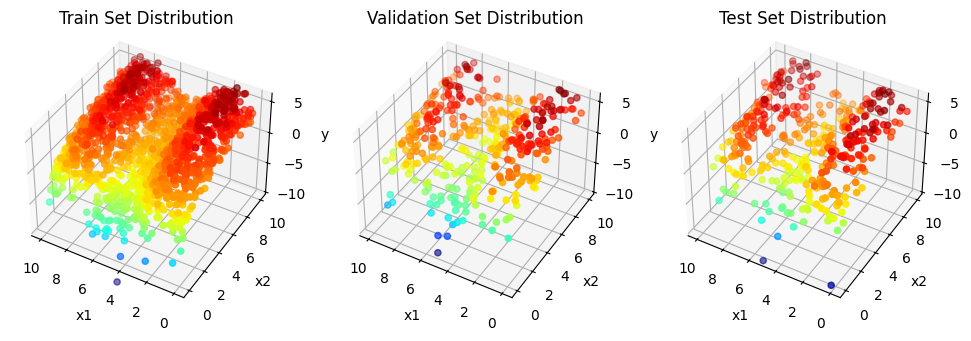

In [8]:

num_data = 2400
x1 = np.random.rand(num_data) * 10
x2 = np.random.rand(num_data) * 10
e = np.random.normal(0, 0.5, num_data)
x = np.array([x1, x2]).T
y = 2 * np.sin(x1) + np.log(0.5*x2**2) + e

x_train, y_train = x[:1600, :], y[:1600]
x_val, y_val = x[1600:2000, :], y[1600:2000]
x_test, y_test = x[2000:, :], y[2000:]

fig = plt.figure(figsize=(12, 5))
ax1 = fig.add_subplot(1, 3, 1, projection='3d')
ax1.scatter(x_train[:, 0], x_train[:, 1], y_train, c=y_train, cmap='jet')

ax1.set_xlabel('x1')
ax1.set_ylabel('x2')
ax1.set_zlabel('y')
ax1.set_title('Train Set Distribution')
ax1.set_zlim(-10, 6)
ax1.view_init(40, -60)
ax1.invert_xaxis()

ax2 = fig.add_subplot(1, 3, 2, projection='3d')
ax2.scatter(x_val[:, 0], x_val[:, 1], y_val, c=y_val, cmap='jet')

ax2.set_xlabel('x1')
ax2.set_ylabel('x2')
ax2.set_zlabel('y')
ax2.set_title('Validation Set Distribution')
ax2.set_zlim(-10, 6)
ax2.view_init(40, -60)
ax2.invert_xaxis()

ax3 = fig.add_subplot(1, 3, 3, projection='3d')
ax3.scatter(x_test[:, 0], x_test[:, 1], y_test, c=y_test, cmap='jet')

ax3.set_xlabel('x1')
ax3.set_ylabel('x2')
ax3.set_zlabel('y')
ax3.set_title('Test Set Distribution')
ax3.set_zlim(-10, 6)
ax3.view_init(40, -60)
ax3.invert_xaxis()

plt.show()

In [9]:
class LinearModel(nn.Module):
    def __init__(self):
        super(LinearModel, self).__init__()
        self.linear = nn.Linear(2, 1, bias=True)
    
    def forward(self, x):
        return self.linear(x)
    
class MLPModel(nn.Module):
    def __init__(self):
        super(MLPModel, self).__init__()
        self.linear1 = nn.Linear(2, 200)
        self.linear2 = nn.Linear(200, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.linear1(x)
        x = self.relu(x)
        x = self.linear2(x)
        return x

In [10]:
reg_loss = nn.MSELoss()

In [11]:
# model = LinearModel()
# print(model.linear.weight)
# print(model.linear.bias)

model = MLPModel()
print('{} parameters'.format(sum(p.numel() for p in model.parameters() if p.requires_grad)))

lr = 0.005
optimizer = optim.SGD(model.parameters(), lr=lr)
list_epoch = []
list_train_loss = []
list_val_loss = []
list_test_loss = []
list_test_epoch = []

epochs = 4000
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model.to(device)
print(device)

for epoch in range(epochs):
    
    model.train()
    optimizer.zero_grad()
    
    train_inputs, train_labels = torch.Tensor(x_train).to(device), torch.Tensor(y_train).to(device)
    train_pred = model(train_inputs)
    
    train_loss = reg_loss(train_pred.squeeze(), train_labels)
    train_loss.backward()
    optimizer.step()
    list_epoch.append(epoch)
    list_train_loss.append(train_loss.item())

    model.eval()
    val_inputs, val_labels = torch.Tensor(x_val).to(device), torch.Tensor(y_val).to(device)
    val_pred = model(val_inputs)
    val_loss = reg_loss(val_pred, val_labels)
    list_val_loss.append(val_loss.item())
    print(f'[{epoch+1:4d}/{epochs:4d}] Train Loss :  {train_loss:.4f}\t| Val loss : {val_loss:.4f}')

    if (epoch+1) % 200 == 0:
        model.eval()
        test_inputs, test_labels = torch.Tensor(x_test).to(device), torch.Tensor(y_test).to(device)
        test_pred = model(test_inputs)
        test_loss = reg_loss(test_pred.squeeze(), test_labels)
        list_test_loss.append(test_loss.item())
        list_test_epoch.append(epoch)
        print(f'Test Loss : {test_loss:.4f}')
        # fig = plt.figure(figsize=(12, 5))
        # ax1 = fig.add_subplot(121, projection='3d')
        # ax1.scatter(x_test[:,0], x_test[:, 1], y_test, c=y_test, cmap='jet')
        # ax1.set_xlabel('x1')
        # ax1.set_ylabel('x2')
        # ax1.set_zlabel('y')
        # ax1.set_zlim(-10, 6)
        # ax1.view_init(40, -40)
        # ax1.set_title('True test y')
        # ax1.invert_xaxis()

        # ax2 = fig.add_subplot(1, 2, 2, projection='3d')
        # ax2.scatter(x_test[:, 0], x_test[:, 1], test_pred, c=test_pred[:,0], cmap='jet')

        # ax2.set_xlabel('x1')
        # ax2.set_ylabel('x2')
        # ax2.set_zlabel('y')
        # ax2.set_zlim(-10, 6)
        # ax2.view_init(40, -40)
        # ax2.set_title('Predicted test y')
        # ax2.invert_xaxis()        

801 parameters
cuda


d:\project\torch_pr\venv\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([400])) that is different to the input size (torch.Size([400, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


[   1/4000] Train Loss :  12.3215	| Val loss : 950.1440
[   2/4000] Train Loss :  938.1061	| Val loss : 21260.3574
[   3/4000] Train Loss :  21893.1289	| Val loss : 6.3760
[   4/4000] Train Loss :  6.7240	| Val loss : 6.3733
[   5/4000] Train Loss :  6.6409	| Val loss : 6.3718
[   6/4000] Train Loss :  6.5589	| Val loss : 6.3718
[   7/4000] Train Loss :  6.4779	| Val loss : 6.3735
[   8/4000] Train Loss :  6.3979	| Val loss : 6.3770
[   9/4000] Train Loss :  6.3187	| Val loss : 6.3823
[  10/4000] Train Loss :  6.2407	| Val loss : 6.3890
[  11/4000] Train Loss :  6.1654	| Val loss : 6.3975
[  12/4000] Train Loss :  6.0915	| Val loss : 6.4073
[  13/4000] Train Loss :  6.0197	| Val loss : 6.4183
[  14/4000] Train Loss :  5.9504	| Val loss : 6.4309
[  15/4000] Train Loss :  5.8828	| Val loss : 6.4449
[  16/4000] Train Loss :  5.8165	| Val loss : 6.4601
[  17/4000] Train Loss :  5.7519	| Val loss : 6.4759
[  18/4000] Train Loss :  5.6887	| Val loss : 6.4923
[  19/4000] Train Loss :  5.6264	

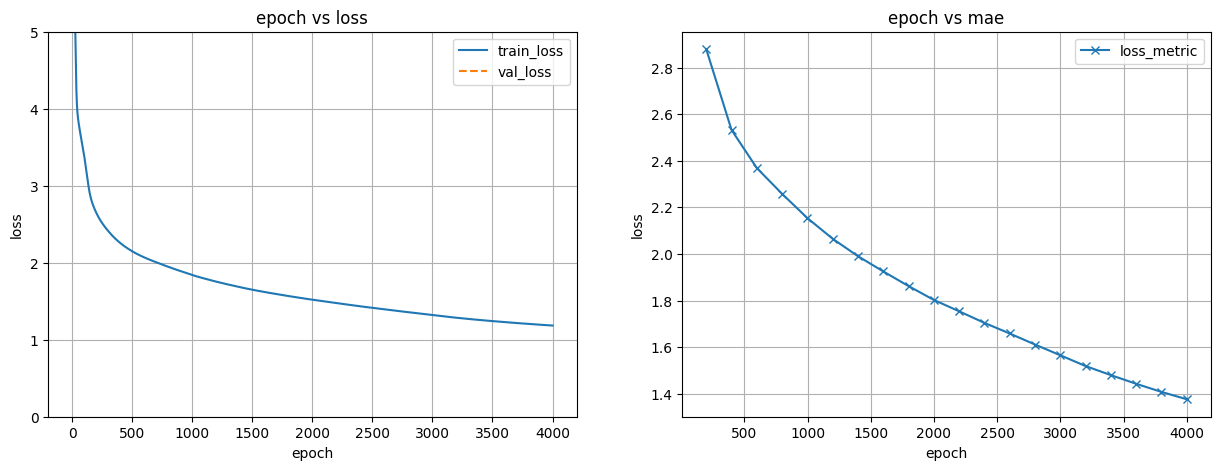

In [12]:
fig = plt.figure(figsize=(15, 5))

ax1 = fig.add_subplot(121)
ax1.plot(list(range(1, 4001)), list_train_loss, label='train_loss')
ax1.plot(list(range(1, 4001)), list_val_loss, '--', label='val_loss')
ax1.set_xlabel('epoch')
ax1.set_ylabel('loss')
ax1.set_ylim(0, 5)
ax1.grid()
ax1.legend()
ax1.set_title('epoch vs loss')

ax2 = fig.add_subplot(1,2,2)
ax2.plot(list_test_epoch, list_test_loss, marker='x', label='loss_metric')
ax2.set_xlabel('epoch')
ax2.set_ylabel('loss')
ax2.grid()
ax2.legend()
ax2.set_title('epoch vs mae')


plt.show()


# 3. Classification (Logistic Regression vs MLP)

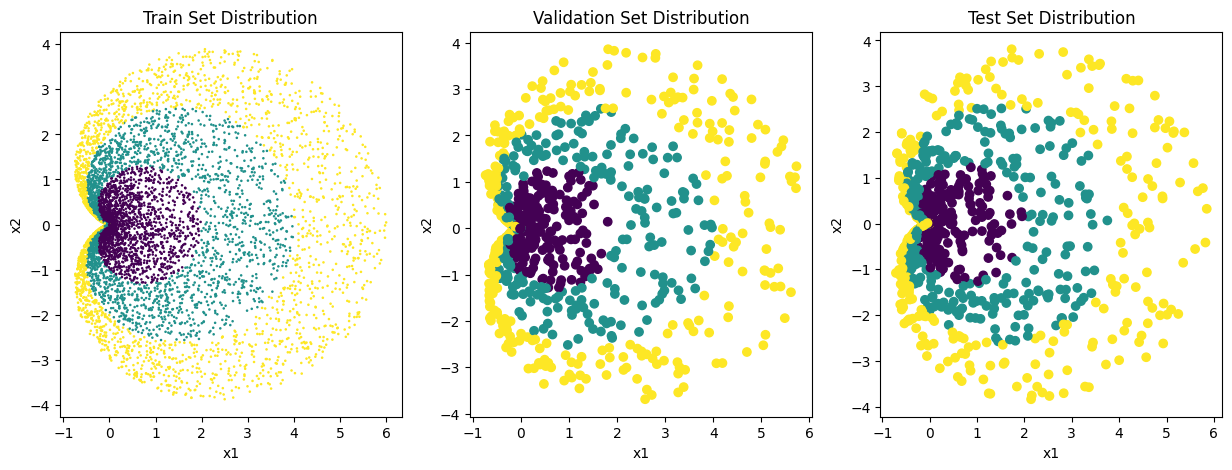

In [13]:
num_data = 10000
r = np.random.rand(num_data) * 3
theta = np.random.rand(num_data) * 2 * np.pi
y = r.astype(int)
r = r * (np.cos(theta) + 1)
x1 = r * np.cos(theta)
x2 = r * np.sin(theta)
x = np.array([x1, x2]).T

x_train, x_val, x_test = x[:8000,], x[8000:9000,:],x[9000:]
y_train, y_val, y_test = y[:8000], y[8000:9000],y[9000:]

fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(1,3,1)
ax1.scatter(x_train[:, 0], x_train[:,1], c=y_train, s=.7)
ax1.set_xlabel('x1')
ax1.set_ylabel('x2')
ax1.set_title('Train Set Distribution')


ax2 = fig.add_subplot(1, 3, 2)
ax2.scatter(x_val[:, 0], x_val[:, 1], c=y_val)
ax2.set_xlabel('x1')
ax2.set_ylabel('x2')
ax2.set_title('Validation Set Distribution')

ax3 = fig.add_subplot(1, 3, 3)
ax3.scatter(x_test[:, 0], x_test[:, 1], c=y_test)
ax3.set_xlabel('x1')
ax3.set_ylabel('x2')
ax3.set_title('Test Set Distribution')
plt.show()

In [14]:
class LinearModel(nn.Module):
    def __init__(self):
        super(LinearModel, self).__init__()
        self.liear = nn.Linear(2, 3, bias=True)
    
    def forward(self, x):
        return self.linear(x)
    
class MLPModel(nn.Module):
    def __init__(self): 
        super(MLPModel, self).__init__()
        self.linear1 = nn.Linear(in_features=2, out_features=200)
        self.linear2 = nn.Linear(in_features=200, out_features=100)
        self.linear3 = nn.Linear(in_features=100, out_features=3)
        self.relu = nn.ReLU()
    
    def forward(self, x):
        x = self.linear1(x)
        x = self.relu(x)
        x = self.linear2(x)
        x = self.relu(x)
        x = self.linear3(x)
        return x

In [15]:
cls_loss = nn.CrossEntropyLoss()

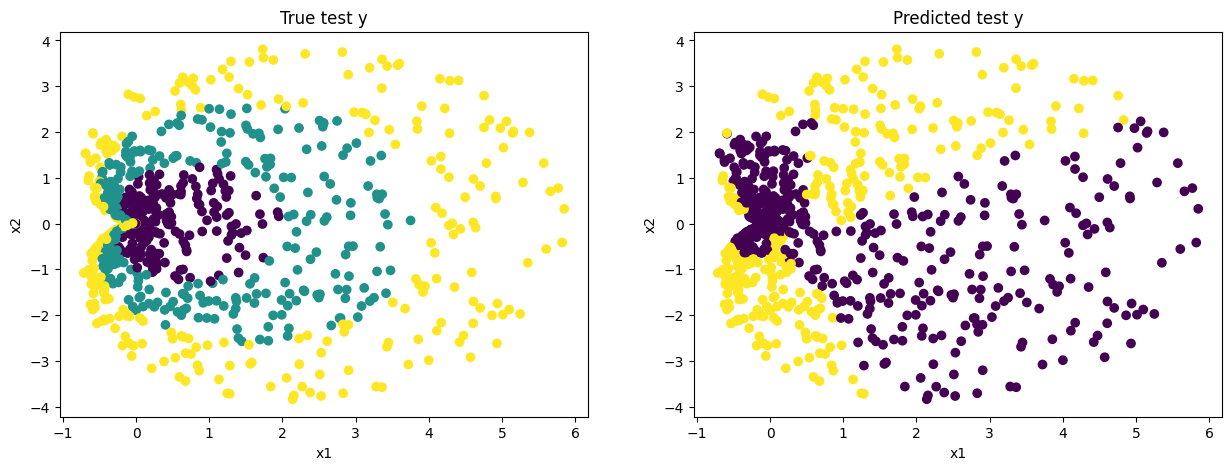

Epoch:  1 Accuracy:  40.5 %


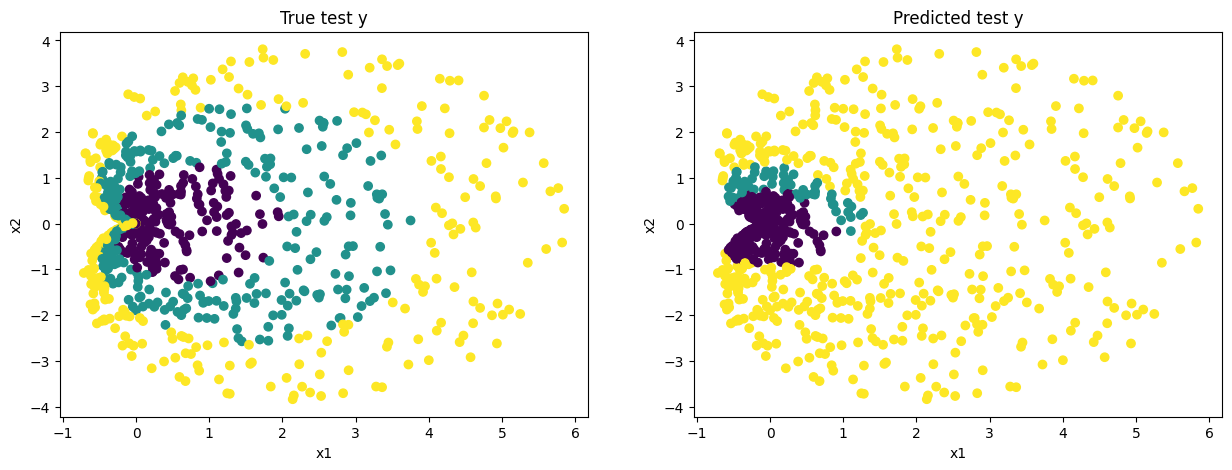

Epoch:  201 Accuracy:  49.4 %


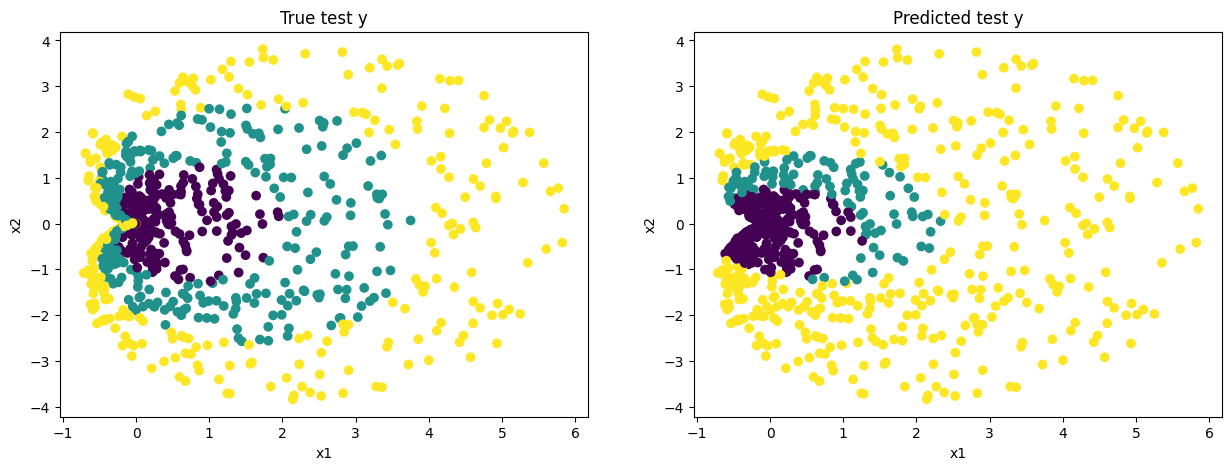

Epoch:  401 Accuracy:  53.800000000000004 %


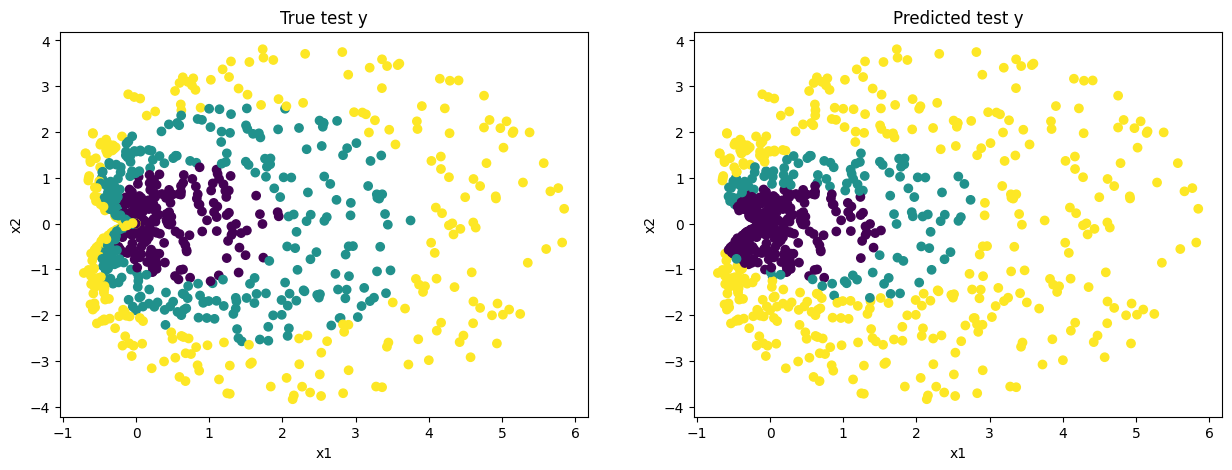

Epoch:  601 Accuracy:  59.099999999999994 %


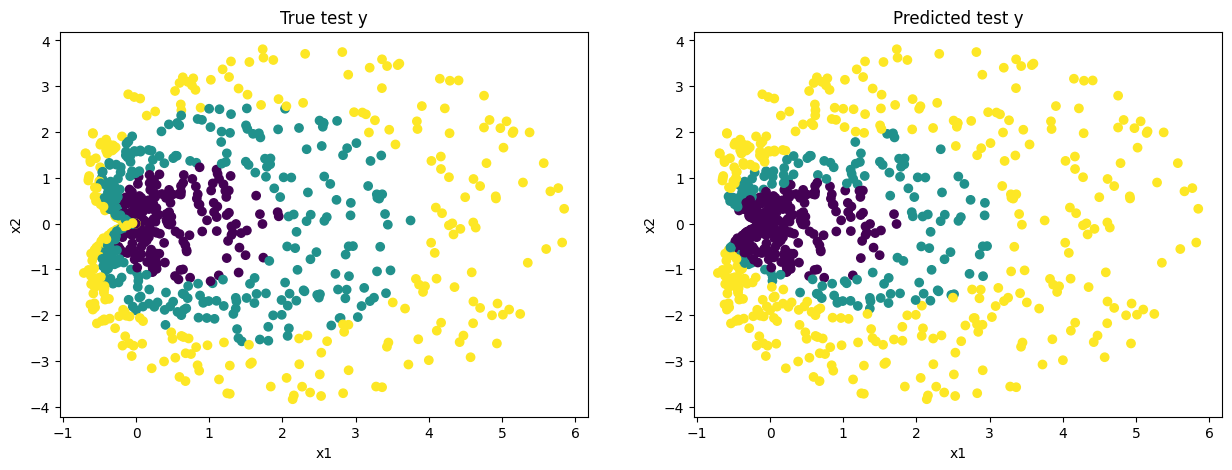

Epoch:  801 Accuracy:  64.8 %


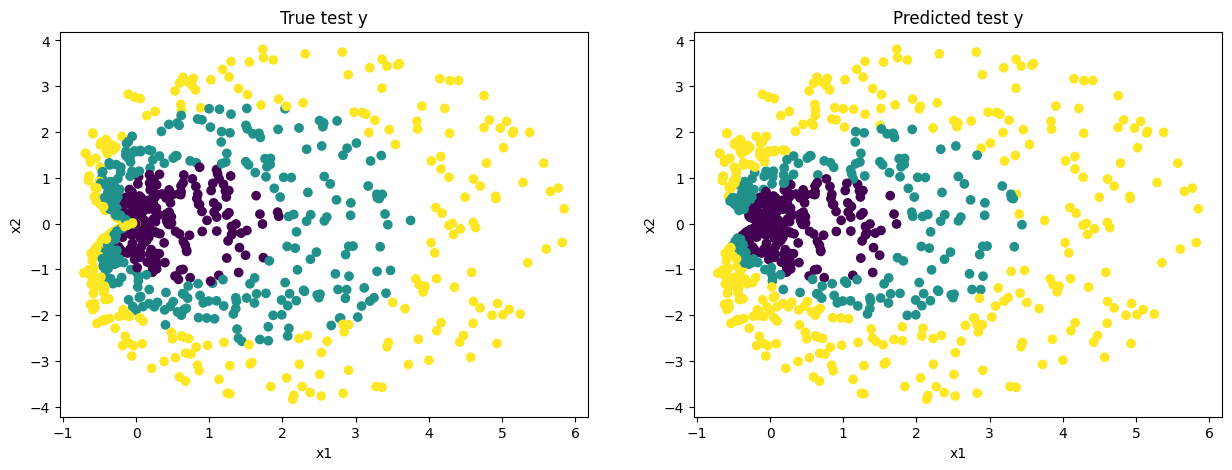

Epoch:  1001 Accuracy:  69.19999999999999 %


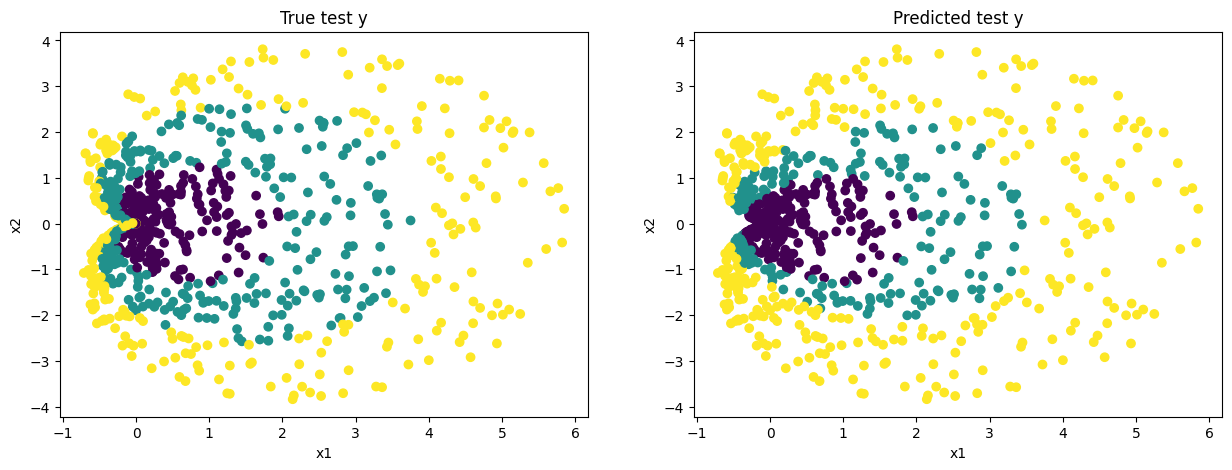

Epoch:  1201 Accuracy:  71.1 %


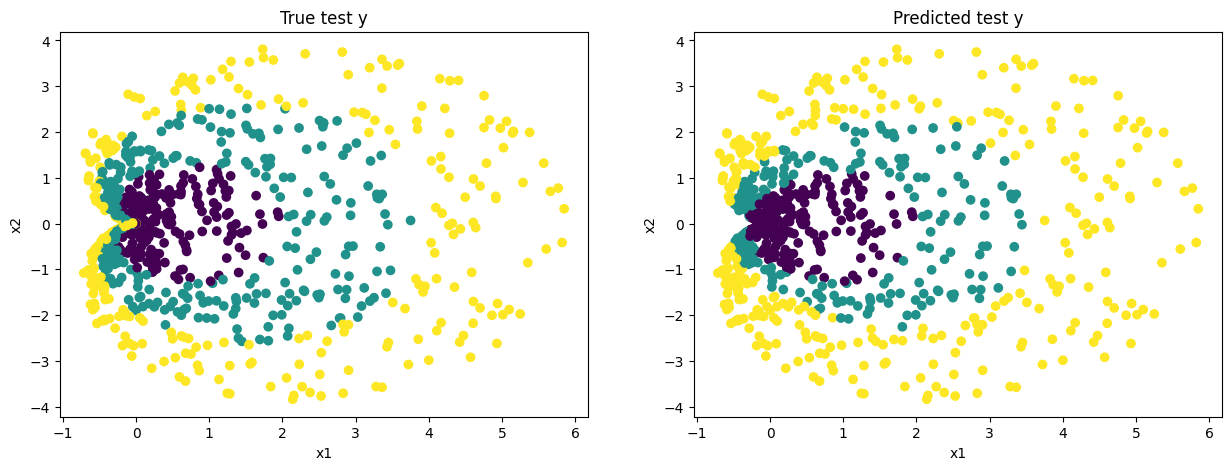

Epoch:  1401 Accuracy:  72.89999999999999 %


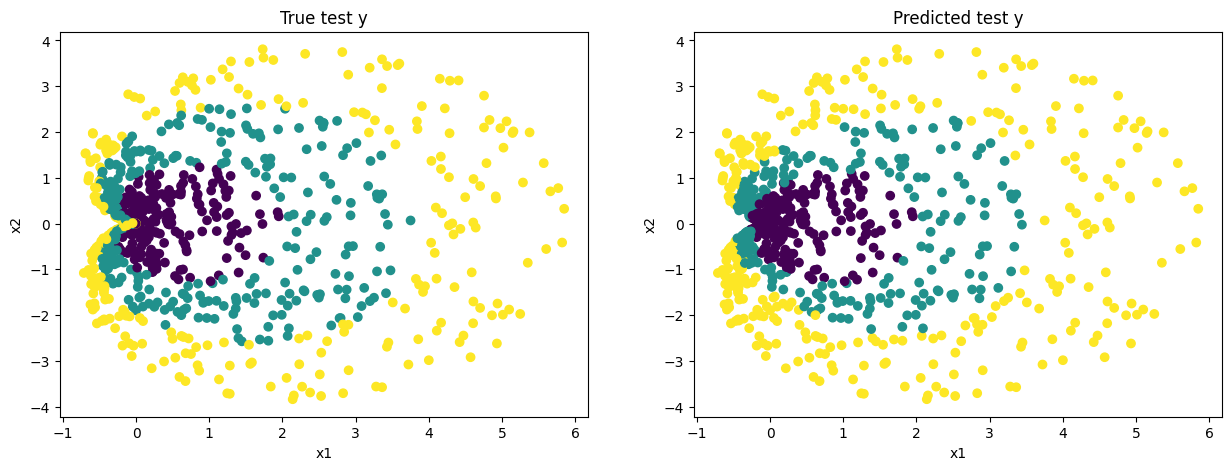

Epoch:  1601 Accuracy:  74.4 %


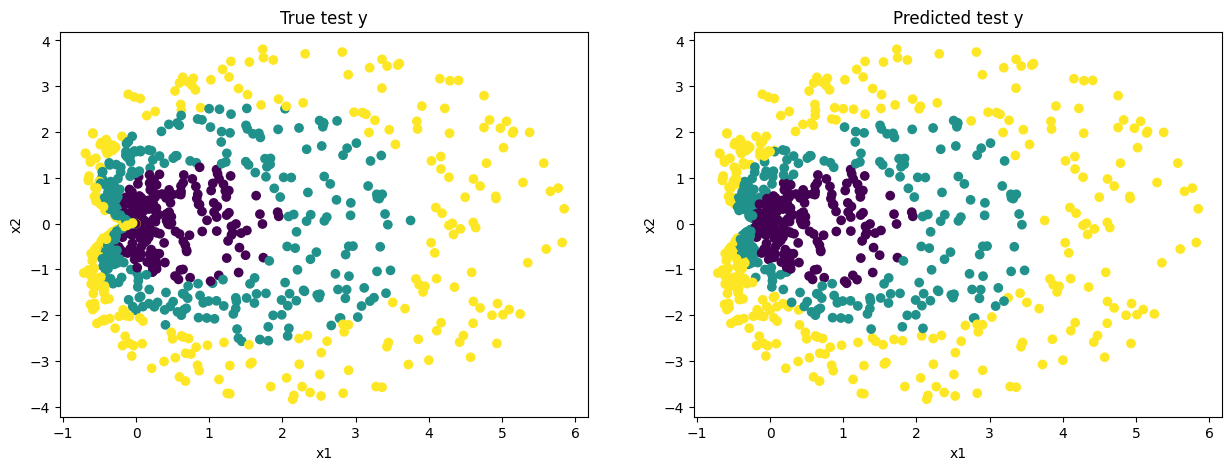

Epoch:  1801 Accuracy:  76.1 %


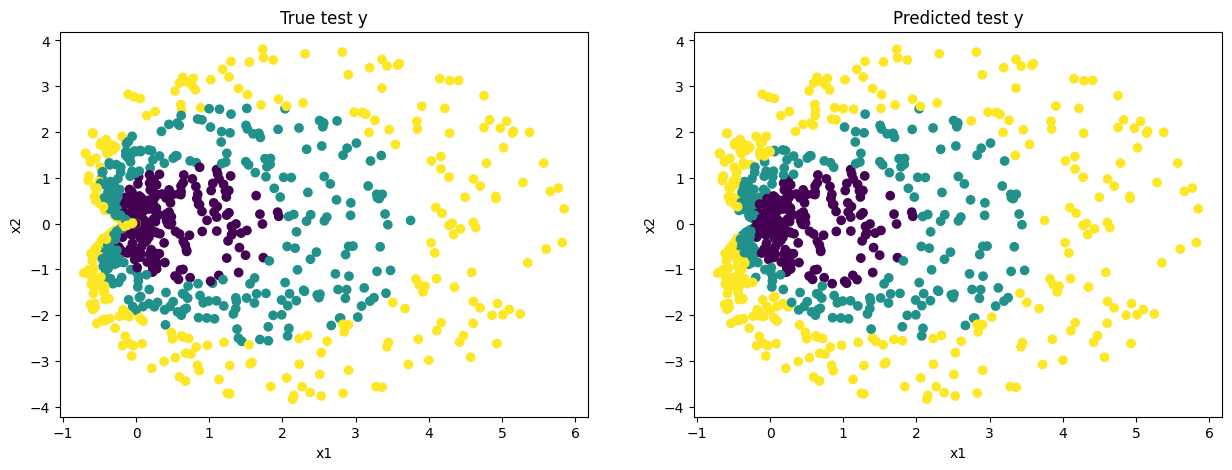

Epoch:  2001 Accuracy:  77.4 %


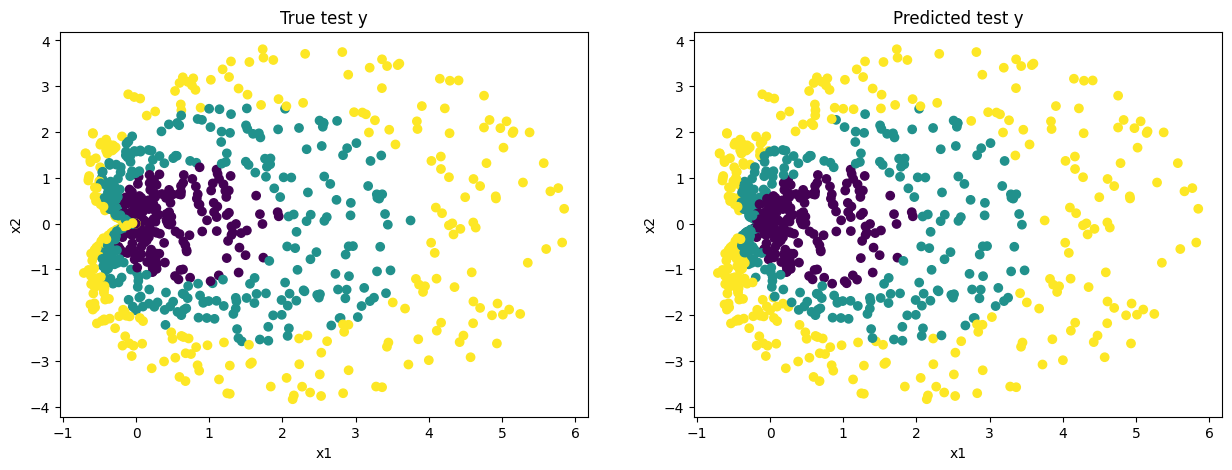

Epoch:  2201 Accuracy:  78.3 %


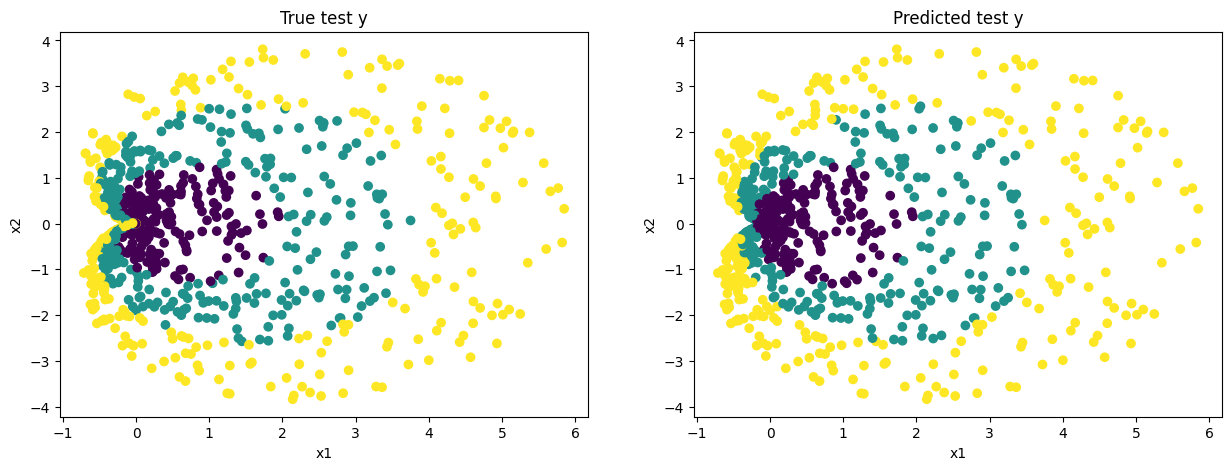

Epoch:  2401 Accuracy:  78.8 %


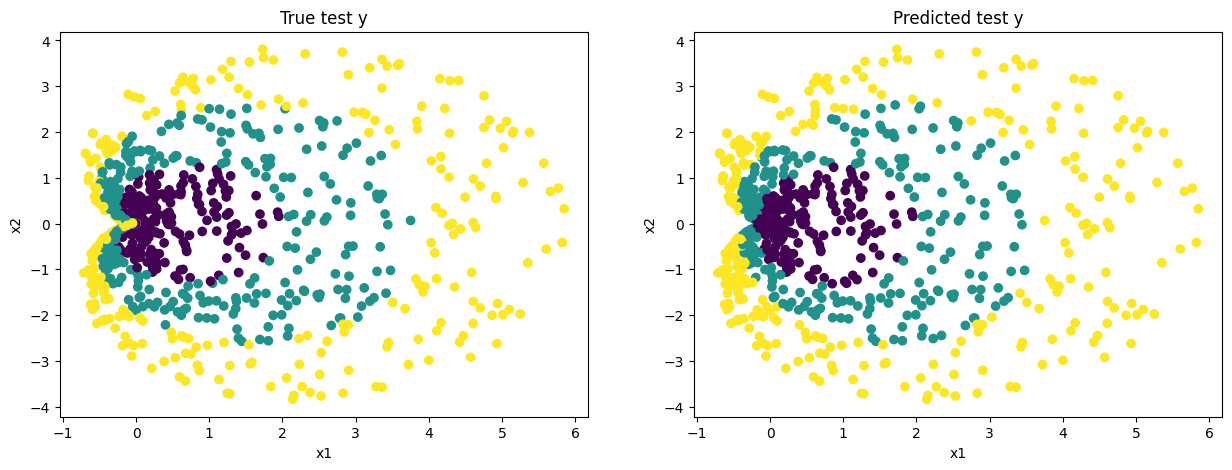

Epoch:  2601 Accuracy:  78.60000000000001 %


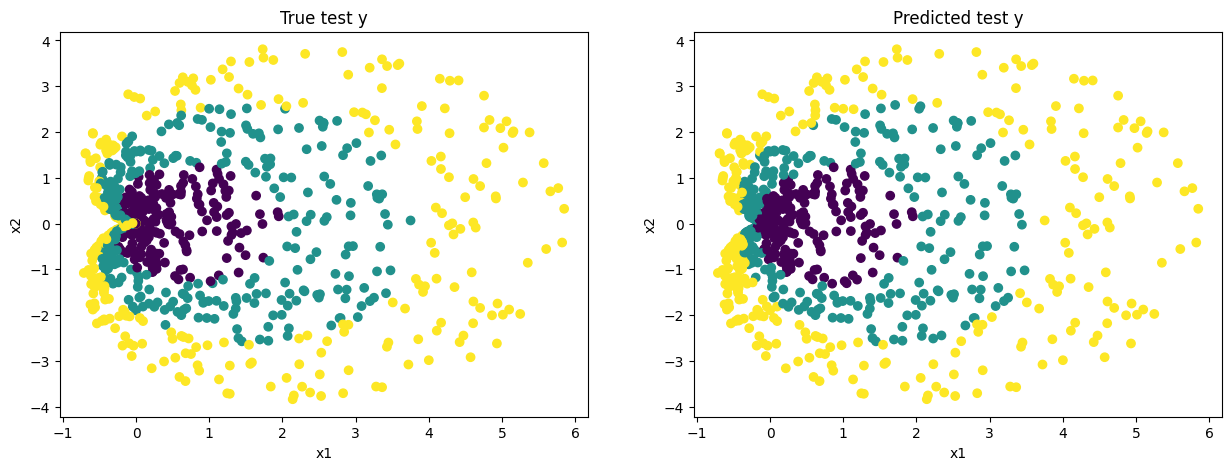

Epoch:  2801 Accuracy:  78.60000000000001 %


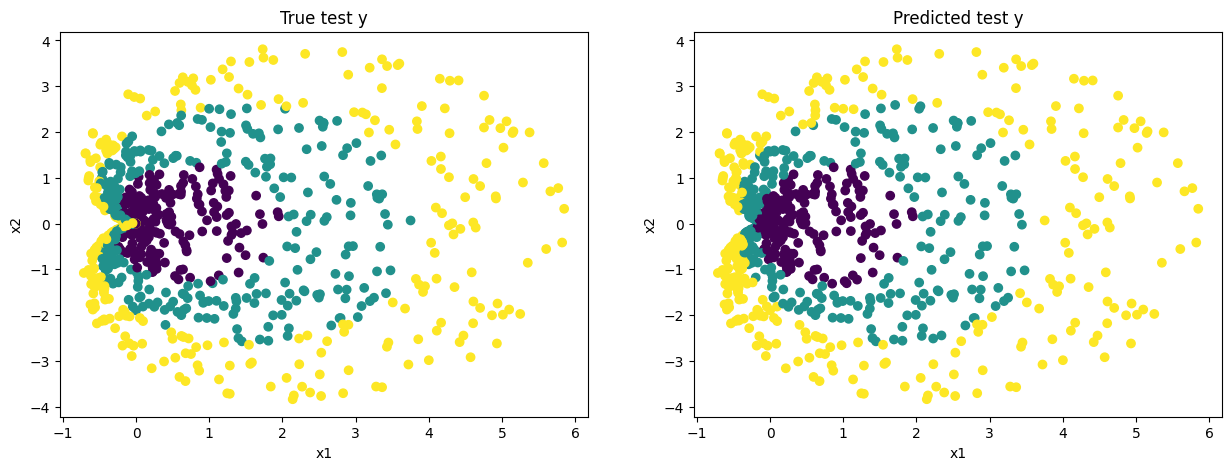

Epoch:  3001 Accuracy:  78.60000000000001 %


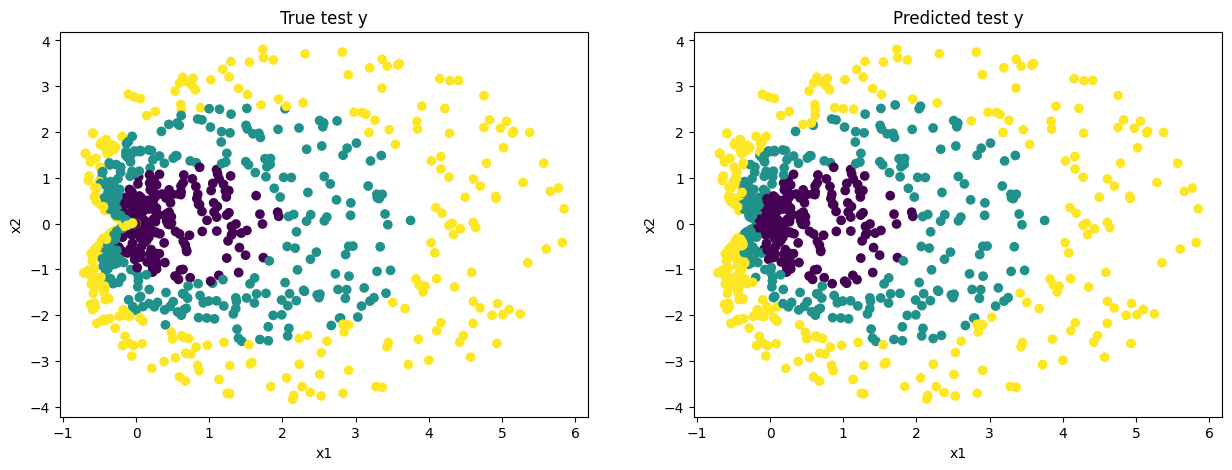

Epoch:  3201 Accuracy:  78.4 %


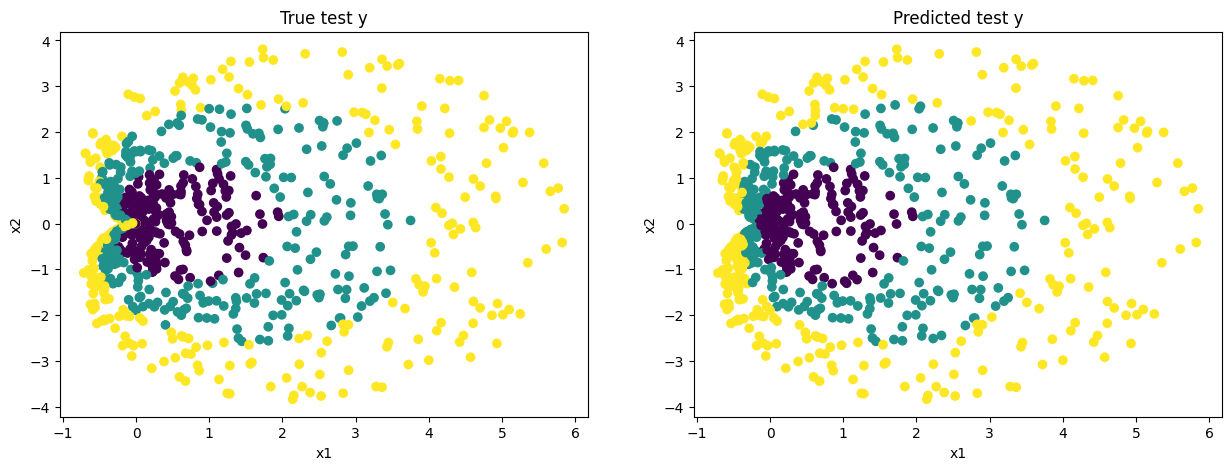

Epoch:  3401 Accuracy:  78.5 %


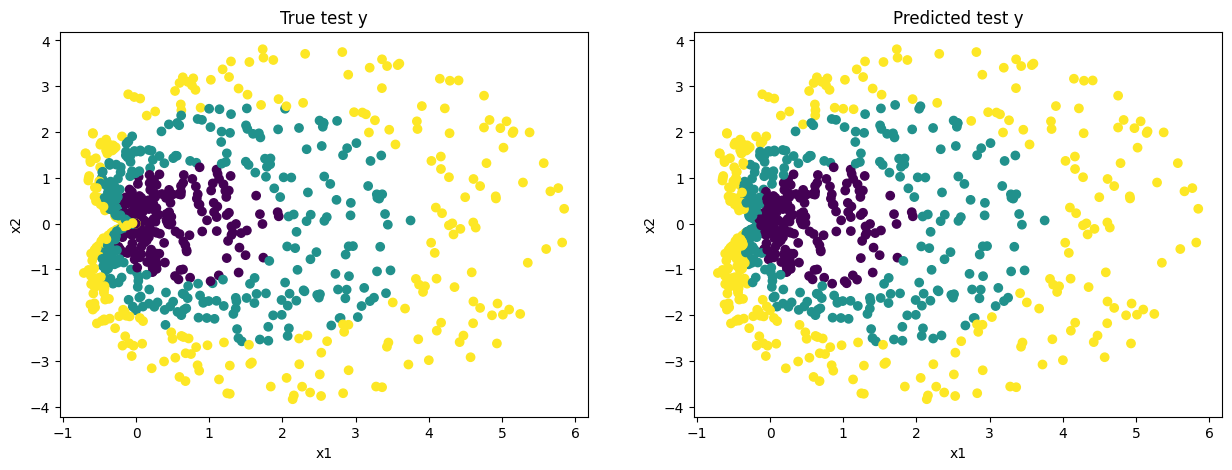

Epoch:  3601 Accuracy:  78.7 %


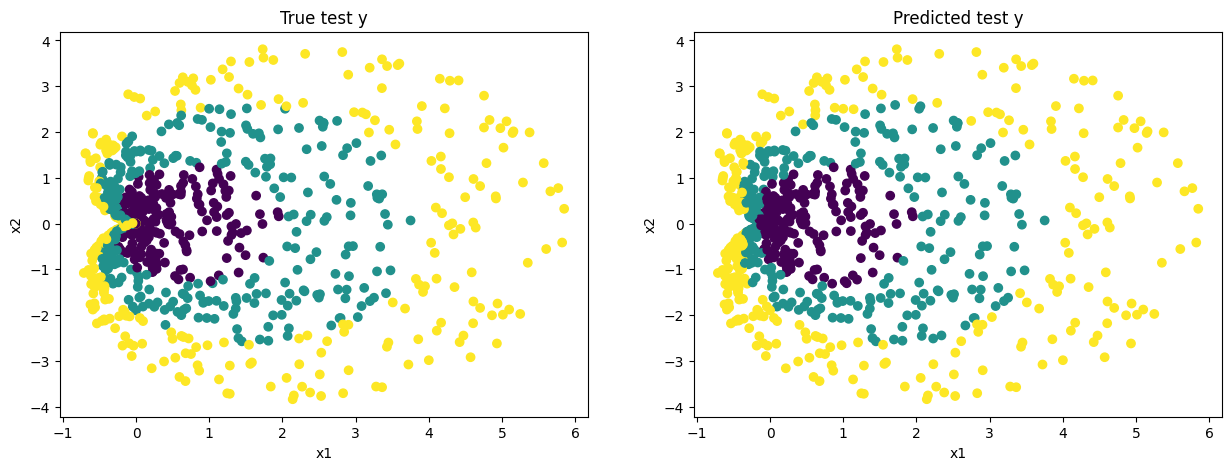

Epoch:  3801 Accuracy:  79.10000000000001 %


In [16]:
from sklearn.metrics import accuracy_score

device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = MLPModel().to(device)

epochs = 4000
lr = .005
optimizer = torch.optim.SGD(model.parameters(), lr)

list_epoch = [] 
list_train_loss = []
list_val_loss = []
list_acc = []
list_acc_epoch = []

for epoch in range(1,epochs+1):
    
    model.train()
    optimizer.zero_grad()

    train_inputs, train_labels = torch.Tensor(x_train).to(device), torch.Tensor(y_train).to(device).long()
    train_pred = model(train_inputs)
    train_loss = cls_loss(train_pred, train_labels)

    train_loss.backward()
    optimizer.step()
    list_epoch.append(epoch)
    list_train_loss.append(train_loss.item())
    
    model.eval()
    val_inputs, val_labels = torch.Tensor(x_val).to(device), torch.Tensor(y_val).long().to(device)
    val_pred = model(val_inputs)
    val_loss = cls_loss(val_pred, val_labels)
    list_val_loss.append(val_loss.item())

    if epoch % 200 == 1:
        model.eval()
        test_inputs, test_labels = torch.Tensor(x_test).to(device), torch.Tensor(y_test).long().to(device)
        test_pred = model(test_inputs)
        acc = accuracy_score(test_pred.cpu().detach().argmax(dim=1), test_labels.cpu())
        list_acc_epoch.append(epoch)
        list_acc.append(acc)
        
        fig = plt.figure(figsize=(15,5))
        
        # ====== True Y Scattering ====== #
        ax1 = fig.add_subplot(1, 2, 1)
        ax1.scatter(x_test[:, 0], x_test[:, 1], c=y_test)
        ax1.set_xlabel('x1')
        ax1.set_ylabel('x2')
        ax1.set_title('True test y')
        
        # ====== Predicted Y Scattering ====== #
        ax2 = fig.add_subplot(1, 2, 2)
        ax2.scatter(x_test[:, 0], x_test[:, 1], c=test_pred.cpu().detach().argmax(dim=1).numpy())
        ax2.set_xlabel('x1')
        ax2.set_ylabel('x2')
        ax2.set_title('Predicted test y')       
        
        plt.show()
        print('Epoch: ', epoch,  'Accuracy: ', acc*100, '%') 

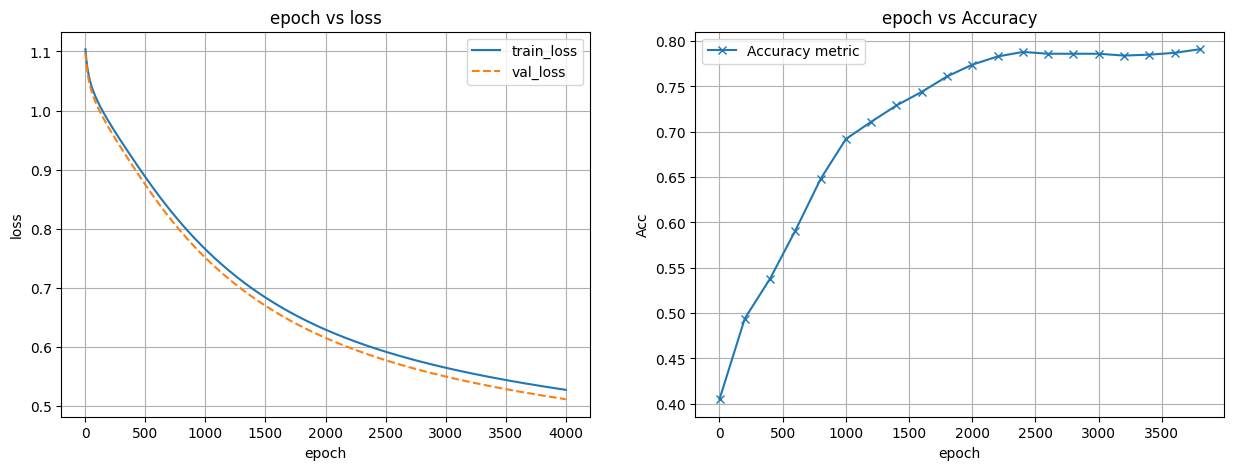

In [17]:
fig = plt.figure(figsize=(15,5))

# ====== Loss Fluctuation ====== #
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(list_epoch, list_train_loss, label='train_loss')
ax1.plot(list_epoch, list_val_loss, '--', label='val_loss')
ax1.set_xlabel('epoch')
ax1.set_ylabel('loss')
ax1.grid()
ax1.legend()
ax1.set_title('epoch vs loss')

# ====== Metric Fluctuation ====== #
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(list_acc_epoch, list_acc, marker='x', label='Accuracy metric')
ax2.set_xlabel('epoch')
ax2.set_ylabel('Acc')
ax2.grid()
ax2.legend()
ax2.set_title('epoch vs Accuracy')

plt.show()

# 4. MNIST Digit Recogntion  

In [18]:
import torch
from torch import nn
from torch.utils.data import DataLoader, Dataset
from torchvision import datasets
from torchvision import transforms

batch_size=128
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.0381,))
])

train_dataset = datasets.MNIST(root='../../data/',
                               download=True,
                               train=True,
                               transform=transform)
test_dataset = datasets.MNIST(root='../../data/',
                              download=True, 
                              train=False,
                              transform=transform)

train_dataset, val_dataset = torch.utils.data.random_split(train_dataset, [50000, 10000])
print(len(train_dataset), len(val_dataset), len(test_dataset))

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

50000 10000 10000


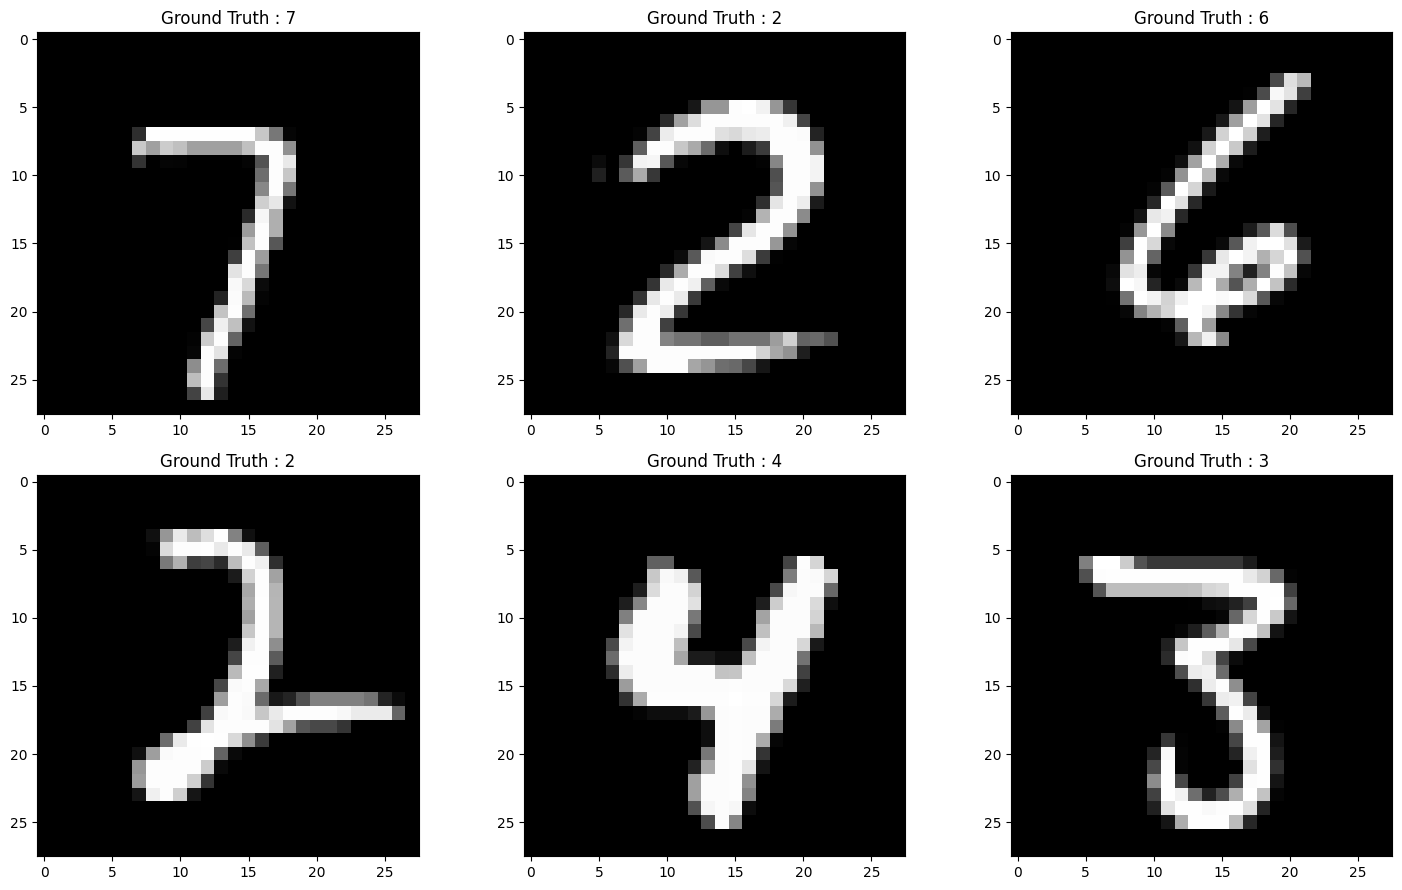

In [19]:
examples = enumerate(train_loader)
batch_idx, (example_data, example_targets) = next(examples)

fig = plt.figure(figsize=(15, 9))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.tight_layout()
    plt.imshow(example_data[i].squeeze(), cmap='gray', interpolation='none')
    plt.title('Ground Truth : {}'.format(example_targets[i]))
plt.show()

In [20]:
class MLPModel(nn.Module):
    def __init__(self):
        super(MLPModel, self).__init__()
        self.sequential = nn.Sequential(
            nn.Flatten(),
            nn.Linear(28*28, 100),
            nn.ReLU(),
            nn.Linear(100, 150),
            nn.ReLU(),
            nn.Linear(150, 50),
            nn.ReLU(),
            nn.Linear(50, 10)
        )
    def forward(self, x):
        return self.sequential(x)

In [21]:
from tqdm import tqdm

cls_loss = nn.CrossEntropyLoss()
model = MLPModel().to(device)
lr = 0.005
optimizer = optim.SGD(model.parameters(), lr=lr)
cls_loss = nn.CrossEntropyLoss()
list_epoch = [] 
list_train_loss = []
list_val_loss = []
list_acc = []
list_acc_epoch = []

epochs = 40
for epoch in tqdm(range(1, epochs+1)):
    
    model.train()
    train_loss = 0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        inputs = inputs.to(device)
        labels = labels.to(device)
        preds = model(inputs)
        loss = cls_loss(preds, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    train_loss /= len(train_loader)
    list_train_loss.append(train_loss)
    list_epoch.append(epoch)
    
    val_loss=0
    with torch.no_grad():
        model.eval()
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            preds = model(inputs)
            loss = cls_loss(preds, labels)
            val_loss+=loss.item()
        val_loss /= len(val_loader)
        list_val_loss.append(val_loss)
    
    correct = 0
    with torch.no_grad():
        model.eval()
        for inputs, labels in test_loader:
            inputs, labels= inputs.to(device), labels.to(device)
            preds = model(inputs).argmax(axis=1)
            correct += preds.eq(labels).sum()
        acc=correct.item() / len(test_loader.dataset)
        list_acc.append(acc)
        list_acc_epoch.append(epoch)
    print('Epoch: {}, Train Loss: {}, Val Loss: {}, Test Acc: {}%'.format(epoch, train_loss, val_loss, acc*100))    

  2%|▎         | 1/40 [00:07<04:43,  7.27s/it]

Epoch: 1, Train Loss: 0.7952237742788651, Val Loss: 0.36803408325472964, Test Acc: 90.10000000000001%


  5%|▌         | 2/40 [00:13<04:10,  6.58s/it]

Epoch: 2, Train Loss: 0.305882731552624, Val Loss: 0.2898115442146229, Test Acc: 92.03%


  8%|▊         | 3/40 [00:19<03:54,  6.35s/it]

Epoch: 3, Train Loss: 0.24572184944854064, Val Loss: 0.2453973655459247, Test Acc: 93.08%


 10%|█         | 4/40 [00:25<03:49,  6.39s/it]

Epoch: 4, Train Loss: 0.2102135860782755, Val Loss: 0.21796096833069115, Test Acc: 93.92%


 12%|█▎        | 5/40 [00:32<03:40,  6.31s/it]

Epoch: 5, Train Loss: 0.18516294730593785, Val Loss: 0.19523258120576037, Test Acc: 94.76%


 15%|█▌        | 6/40 [00:38<03:31,  6.22s/it]

Epoch: 6, Train Loss: 0.16486949944282736, Val Loss: 0.1793287343616727, Test Acc: 95.0%


 18%|█▊        | 7/40 [00:44<03:24,  6.21s/it]

Epoch: 7, Train Loss: 0.14914699734362494, Val Loss: 0.16716773015788838, Test Acc: 95.42%


 20%|██        | 8/40 [00:50<03:16,  6.14s/it]

Epoch: 8, Train Loss: 0.13581341336412198, Val Loss: 0.16183837418314778, Test Acc: 95.5%


 22%|██▎       | 9/40 [00:56<03:15,  6.32s/it]

Epoch: 9, Train Loss: 0.12489871646437194, Val Loss: 0.14877154857297487, Test Acc: 95.86%


 25%|██▌       | 10/40 [01:03<03:10,  6.35s/it]

Epoch: 10, Train Loss: 0.11524843404550686, Val Loss: 0.14643850083215326, Test Acc: 95.98%


 28%|██▊       | 11/40 [01:09<03:01,  6.25s/it]

Epoch: 11, Train Loss: 0.10635016296449525, Val Loss: 0.13941384380376792, Test Acc: 96.28999999999999%


 30%|███       | 12/40 [01:15<02:57,  6.33s/it]

Epoch: 12, Train Loss: 0.09893008299610194, Val Loss: 0.12822713071032416, Test Acc: 96.39999999999999%


 32%|███▎      | 13/40 [01:22<02:54,  6.46s/it]

Epoch: 13, Train Loss: 0.09258537213115589, Val Loss: 0.12955668106486526, Test Acc: 96.46000000000001%


 35%|███▌      | 14/40 [01:28<02:45,  6.35s/it]

Epoch: 14, Train Loss: 0.0861171948511506, Val Loss: 0.12693920797562297, Test Acc: 96.34%


 38%|███▊      | 15/40 [01:34<02:34,  6.20s/it]

Epoch: 15, Train Loss: 0.08123867692725967, Val Loss: 0.12019235310675222, Test Acc: 96.58%


 40%|████      | 16/40 [01:40<02:25,  6.08s/it]

Epoch: 16, Train Loss: 0.07597778625119372, Val Loss: 0.1143227726504018, Test Acc: 96.7%


 42%|████▎     | 17/40 [01:46<02:19,  6.04s/it]

Epoch: 17, Train Loss: 0.07142919647838454, Val Loss: 0.11489935438561288, Test Acc: 96.85000000000001%


 45%|████▌     | 18/40 [01:52<02:12,  6.00s/it]

Epoch: 18, Train Loss: 0.06754159414307083, Val Loss: 0.11346588088081608, Test Acc: 96.74000000000001%


 48%|████▊     | 19/40 [01:58<02:05,  5.98s/it]

Epoch: 19, Train Loss: 0.06365423825333642, Val Loss: 0.11091937131802493, Test Acc: 96.81%


 50%|█████     | 20/40 [02:04<02:03,  6.17s/it]

Epoch: 20, Train Loss: 0.06022343089770707, Val Loss: 0.11335762184631976, Test Acc: 97.00999999999999%


 52%|█████▎    | 21/40 [02:11<01:59,  6.28s/it]

Epoch: 21, Train Loss: 0.05685702093002741, Val Loss: 0.10836604435609866, Test Acc: 97.07000000000001%


 55%|█████▌    | 22/40 [02:18<01:56,  6.50s/it]

Epoch: 22, Train Loss: 0.054261568419235136, Val Loss: 0.10529241982045807, Test Acc: 97.11999999999999%


 57%|█████▊    | 23/40 [02:26<01:56,  6.83s/it]

Epoch: 23, Train Loss: 0.05115099789817696, Val Loss: 0.1052671683645701, Test Acc: 97.11%


 60%|██████    | 24/40 [02:32<01:45,  6.61s/it]

Epoch: 24, Train Loss: 0.04832069153952248, Val Loss: 0.10372872641192207, Test Acc: 97.16%


 62%|██████▎   | 25/40 [02:38<01:39,  6.61s/it]

Epoch: 25, Train Loss: 0.045751500054193504, Val Loss: 0.10339779538821571, Test Acc: 97.14%


 65%|██████▌   | 26/40 [02:44<01:31,  6.51s/it]

Epoch: 26, Train Loss: 0.04368285600767683, Val Loss: 0.10109780450599103, Test Acc: 97.14%


 68%|██████▊   | 27/40 [02:52<01:29,  6.89s/it]

Epoch: 27, Train Loss: 0.04154745389914612, Val Loss: 0.09891640559970578, Test Acc: 97.24000000000001%


 70%|███████   | 28/40 [02:59<01:21,  6.82s/it]

Epoch: 28, Train Loss: 0.039226381436866874, Val Loss: 0.10025998619915563, Test Acc: 97.17%


 72%|███████▎  | 29/40 [03:05<01:13,  6.65s/it]

Epoch: 29, Train Loss: 0.037152039630295675, Val Loss: 0.10227890602678438, Test Acc: 97.2%


 75%|███████▌  | 30/40 [03:12<01:07,  6.76s/it]

Epoch: 30, Train Loss: 0.03560818888275596, Val Loss: 0.10056542746628387, Test Acc: 97.24000000000001%


 78%|███████▊  | 31/40 [03:19<01:01,  6.85s/it]

Epoch: 31, Train Loss: 0.033424203138788945, Val Loss: 0.09805737235406532, Test Acc: 97.36%


 80%|████████  | 32/40 [03:27<00:55,  6.97s/it]

Epoch: 32, Train Loss: 0.03189484625483108, Val Loss: 0.0995297770051262, Test Acc: 97.38%


 82%|████████▎ | 33/40 [03:33<00:46,  6.70s/it]

Epoch: 33, Train Loss: 0.030010850748757038, Val Loss: 0.09737263756650913, Test Acc: 97.3%


 85%|████████▌ | 34/40 [03:39<00:39,  6.53s/it]

Epoch: 34, Train Loss: 0.028761907586651612, Val Loss: 0.09815699100211452, Test Acc: 97.28%


 88%|████████▊ | 35/40 [03:45<00:31,  6.34s/it]

Epoch: 35, Train Loss: 0.027539128279241987, Val Loss: 0.0986681286528518, Test Acc: 97.35000000000001%


 90%|█████████ | 36/40 [03:51<00:25,  6.28s/it]

Epoch: 36, Train Loss: 0.026009980874383807, Val Loss: 0.09875019090368023, Test Acc: 97.31%


 92%|█████████▎| 37/40 [03:57<00:18,  6.21s/it]

Epoch: 37, Train Loss: 0.024542245198674786, Val Loss: 0.10592546652342323, Test Acc: 97.32%


 95%|█████████▌| 38/40 [04:05<00:13,  6.83s/it]

Epoch: 38, Train Loss: 0.02349537472142969, Val Loss: 0.09845317031339376, Test Acc: 97.39999999999999%


 98%|█████████▊| 39/40 [04:13<00:07,  7.27s/it]

Epoch: 39, Train Loss: 0.022337407987240866, Val Loss: 0.09743046118064394, Test Acc: 97.31%


100%|██████████| 40/40 [04:21<00:00,  6.54s/it]

Epoch: 40, Train Loss: 0.021106133793654572, Val Loss: 0.09979117326909982, Test Acc: 97.38%


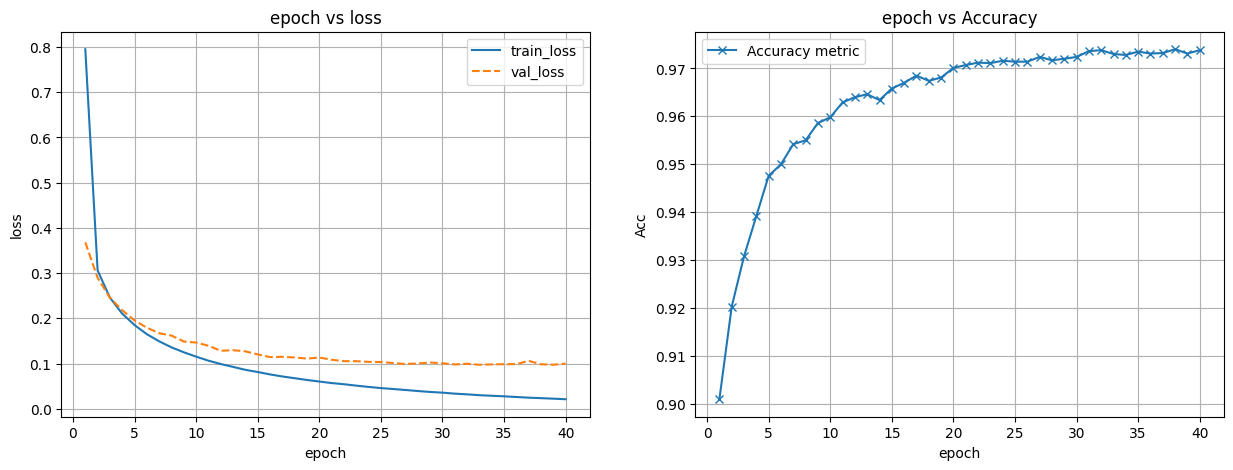

In [22]:
fig = plt.figure(figsize=(15,5))

# ====== Loss Fluctuation ====== #
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(list_epoch, list_train_loss, label='train_loss')
ax1.plot(list_epoch, list_val_loss, '--', label='val_loss')
ax1.set_xlabel('epoch')
ax1.set_ylabel('loss')
ax1.grid()
ax1.legend()
ax1.set_title('epoch vs loss')

# ====== Metric Fluctuation ====== #
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(list_acc_epoch, list_acc, marker='x', label='Accuracy metric')
ax2.set_xlabel('epoch')
ax2.set_ylabel('Acc')
ax2.grid()
ax2.legend()
ax2.set_title('epoch vs Accuracy')

plt.show()

# 5. Write Pretty DLcode

In [23]:
import torch
import torchvision
from torchvision import transforms
from torch import nn
import torch.nn.functional as F
from torch import optim
import argparse
import numpy as np

In [24]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='../../data', 
                                        train=True,
                                        download=True, 
                                        transform=transform)
trainset, valset = torch.utils.data.random_split(trainset, [40000, 10000])
testset = torchvision.datasets.CIFAR10(root='../../data', 
                                       train=False,
                                       download=True, 
                                       transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)
valloader = torch.utils.data.DataLoader(valset, batch_size=4, 
                                        shuffle=False)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [25]:
class MLP(nn.Module):
    def __init__(self, in_dim, out_dim, hid_dim, n_layer, act):
        super(MLP, self).__init__()
        self.in_dim = in_dim
        self.out_dim = out_dim
        self.hid_dim = hid_dim
        self.n_layer = n_layer
        self.act = act
        self.fc = nn.Linear(self.in_dim, self.hid_dim)
        self.linears = nn.ModuleList()
        for fc in range(self.n_layer-1):
            self.linears.append(nn.Linear(self.hid_dim, self.hid_dim))
        self.fc2 = nn.Linear(self.hid_dim, self.out_dim)
        if self.act == 'relu':
            self.act = nn.ReLU()
        
    def forward(self, x):
        x = self.act(self.fc(nn.Flatten()(x)))
        for fc in self.linears:
            x = self.act(fc(x))
        x = self.fc2(x)
        return x

net = MLP(3072, 10, 100, 4, 'relu').to(device)

print(net)

MLP(
  (fc): Linear(in_features=3072, out_features=100, bias=True)
  (linears): ModuleList(
    (0-2): 3 x Linear(in_features=100, out_features=100, bias=True)
  )
  (fc2): Linear(in_features=100, out_features=10, bias=True)
  (act): ReLU()
)


In [26]:
def experiment(args):
    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    net = MLP(args.in_dim, args.out_dim, args.hid_dim, args.n_layer, args.act).to(device)
    print(net) 

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(net.parameters(), lr=args.lr, momentum=args.mm)
    for epoch in range(args.epochs):
        net.train()
        running_loss, train_loss = 0., 0.
        for i, (x, y) in enumerate(trainloader):
            optimizer.zero_grad()
            x, y = x.to(device), y.to(device)
            outputs = net(x)
            loss = criterion(outputs, y)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
            train_loss += loss.item()
            if i % 2000 == 1999:
                print('[%d, %5d] loss : %.3f' %(epoch+1, i+1, running_loss/2000))
                running_loss = 0.0

    net.eval()
    correct, total, val_loss = 0, 0, 0
    with torch.no_grad():
        for x, y in valloader:
            x, y = x.to(device), y.to(device)
            outputs = net(x)
            loss = criterion(outputs, y)
            val_loss += loss.item()
            _, pred = torch.max(outputs.data, 1)
            total += y.size(0)
            correct += (pred == y).sum().item()

        val_loss /= len(valloader)
        val_acc = 100 * correct / total
    print('Epoch {}, Train Loss: {}, Val Loss: {}, Val Acc: {}'.format(epoch, train_loss, val_loss, val_acc ))

    net.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for image, label in testloader:
            image, label = image.to(device), label.to(device)
            outputs = net(image)
            _, pred = torch.max(outputs.data, 1)
            total += label.size(0)
            correct += (pred == label).sum().item()
        test_acc = 100*correct / total
    return train_loss, val_loss, val_acc, test_acc

In [27]:
seed = 123
np.random.seed(seed)
torch.manual_seed(seed)

parser = argparse.ArgumentParser()
args = parser.parse_args("")


args.n_layer = 5
args.in_dim = 3072
args.out_dim = 10
args.hid_dim = 100
args.act = 'relu'

args.lr = 0.001
args.mm = 0.9
args.epochs = 2


list_var1 = [4, 5, 6]
list_var2 = [50, 100, 150]

for var1 in list_var1:
    for var2 in list_var2:
        args.n_layer = var1
        args.hid_dim = var2
        result = experiment(args)
        print(result)

MLP(
  (fc): Linear(in_features=3072, out_features=50, bias=True)
  (linears): ModuleList(
    (0-2): 3 x Linear(in_features=50, out_features=50, bias=True)
  )
  (fc2): Linear(in_features=50, out_features=10, bias=True)
  (act): ReLU()
)
[1,  2000] loss : 2.188
[1,  4000] loss : 1.909
[1,  6000] loss : 1.774
[1,  8000] loss : 1.721
[1, 10000] loss : 1.681
[2,  2000] loss : 1.612
[2,  4000] loss : 1.616
[2,  6000] loss : 1.599
[2,  8000] loss : 1.589
[2, 10000] loss : 1.553
Epoch 1, Train Loss: 15938.318305850029, Val Loss: 1.5667195276379586, Val Acc: 45.02
(15938.318305850029, 1.5667195276379586, 45.02, 45.94)
MLP(
  (fc): Linear(in_features=3072, out_features=100, bias=True)
  (linears): ModuleList(
    (0-2): 3 x Linear(in_features=100, out_features=100, bias=True)
  )
  (fc2): Linear(in_features=100, out_features=10, bias=True)
  (act): ReLU()
)
[1,  2000] loss : 2.220
[1,  4000] loss : 1.899
[1,  6000] loss : 1.786
[1,  8000] loss : 1.714
[1, 10000] loss : 1.657
[2,  2000] loss :

# 6. Regularization implemented

In [28]:
import torch
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from torch import nn, optim
import torch.nn.functional as F
import argparse
import numpy as np
import time

In [29]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = datasets.CIFAR10(root='../../data/', 
                            train=True, 
                            download=True,
                            transform=transform)
testset = datasets.CIFAR10(root='../../data/',
                           download=True,
                           train=False,
                           transform=transform)
trainset, valset = torch.utils.data.random_split(trainset, [40000, 10000])
partition = {'train' : trainset, 'val' : valset, 'test' : testset}


Files already downloaded and verified
Files already downloaded and verified


In [30]:
class MLP(nn.Module):
    def __init__(self, in_dim, out_dim, hid_dim, n_layer, act, dropout, use_bn, use_xavier):
        super(MLP, self).__init__()
        self.in_dim = in_dim
        self.out_dim = out_dim
        self.hid_dim = hid_dim
        self.n_layer = n_layer
        self.act = act
        self.dropout = dropout
        self.use_bn = use_bn
        self.use_xavier = use_xavier
        
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(self.in_dim, self.hid_dim)
        self.linears = nn.ModuleList()
        self.bns = nn.ModuleList()
        for _ in range(self.n_layer - 1):
            self.linears.append(nn.Linear(self.hid_dim, self.hid_dim))
            if self.use_bn:
                self.bns.append(nn.BatchNorm1d(self.hid_dim))

        self.fc2 = nn.Linear(self.hid_dim, self.out_dim)

        if self.act == 'relu':
            self.act = nn.ReLU()
        elif self.act == 'tanh':
            self.act = nn.Tanh()
        elif self.act == 'sigmoid':
            self.act = nn.Sigmoid()
        else:
            raise ValueError('no valid activation function selected!')
        
        self.dropout = nn.Dropout(self.dropout)
        if self.use_xavier:
            self.xavier_init()
        
    def forward(self, x):
        x = self.act(self.fc1(self.flatten(x)))
        for i in range(len(self.linears)):
            x = self.act(self.linears[i](x))
            x = self.bns[i](x)
            x = self.dropout(x)
        x = self.fc2(x)
        return x 
    
    def xavier_init(self):
        for linear in self.linears:
            nn.init.xavier_normal_(linear.weight)
            linear.bias.data.fill_(0.01)

net = MLP(3072, 10, 100, 4, 'relu', 0.1, True, True)
print(net)


MLP(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=3072, out_features=100, bias=True)
  (linears): ModuleList(
    (0-2): 3 x Linear(in_features=100, out_features=100, bias=True)
  )
  (bns): ModuleList(
    (0-2): 3 x BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (fc2): Linear(in_features=100, out_features=10, bias=True)
  (act): ReLU()
  (dropout): Dropout(p=0.1, inplace=False)
)


In [31]:
def train(net, optimizer, criterion, device, args):    
    trainloader = DataLoader(partition['train'], batch_size=args.train_batch_size,
                             shuffle=True, )
    net.train()
    correct, total, train_loss = 0, 0, 0.0
    for i, (x, y) in enumerate(trainloader):
        optimizer.zero_grad()
        x, y = x.to(device), y.to(device)
        outputs = net(x)
        loss = criterion(outputs, y)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        pred = torch.argmax(outputs, 1)
        correct += (pred == y).sum().item()
        total += y.size(0)
    train_loss /= len(trainloader)
    train_acc = 100 * correct / total
    return net, train_loss, train_acc

def validate(net, criterion, device, args):
    valloader = DataLoader(partition['val'], batch_size=args.test_batch_size,
                           shuffle=True,)
    net.eval()
    correct, total, val_loss = 0, 0, 0.0
    with torch.no_grad():
        for x, y in valloader:
            x, y= x.to(device), y.to(device)
            outputs = net(x)
            loss = criterion(outputs, y)
            val_loss += loss.item()
            pred = torch.argmax(outputs, 1)
            total += y.size(0)
            correct = (pred==y).sum().item()
        val_loss /= len(valloader)
        val_acc = 100 * correct / total
    return val_loss, val_acc

def test(net, criterion, device, args):
    testloader = DataLoader(partition['test'], batch_size=args.test_batch_size,
                           shuffle=True,)
    net.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for x, y in testloader:
            x, y= x.to(device), y.to(device)
            outputs = net(x)
            pred = torch.argmax(outputs, 1)
            total += y.size(0)
            correct = (pred==y).sum().item()
        test_acc = 100 * correct / total
    return test_acc
            

In [32]:
def experiment(args):
    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    net = MLP(args.in_dim, args.out_dim, args.hid_dim, args.n_layer, args.act, args.dropout, 
              args.use_bn, args.use_xavier).to(device)
    criterion = nn.CrossEntropyLoss()
    if args.optim == 'SGD':
        optimizer = optim.SGD(net.parameters(), lr=args.lr, weight_decay=args.l2)
    elif args.optim == 'RMSprop':
        optimizer = optim.RMSprop(net.parameters(), lr=args.lr, weight_decay=args.l2)
    elif args.optim == 'Adam':
        optimizer = optim.Adam(net.parameters(), lr=args.lr, weight_decay=args.l2)
    else:
        raise ValueError('In-valid optimizer choice')

    for epoch in range(args.epochs):
        ts = time.time()
        net, train_loss, train_acc = train(net, optimizer, criterion, device, args)
        val_loss, val_acc = validate(net, criterion, device, args)
        te = time.time()
        print('Epoch {}, Acc(train/val) : {:2.2f}/{:2.2f}\t Loss(train/val) : {:2.2f}/{:2.2f} \t Took {:2.2f}sec'.format(epoch, train_acc, val_acc, train_loss, val_loss, te-ts))
    test_acc = test(net, criterion, device, args)
    return train_loss, val_loss, train_acc, val_acc, test_acc


In [33]:
seed = 123
np.random.seed(seed)
torch.manual_seed(seed)

parser = argparse.ArgumentParser()
args = parser.parse_args("")

args.in_dim = 3072
args.out_dim = 10
args.hid_dim = 100
args.act = 'relu'

args.dropout = 0.2
args.use_bn = True
args.l2 = 0.00001
args.use_xavier = True

args.optim = 'SGD' 
args.lr = 0.0015
args.epochs = 10

args.train_batch_size = 256
args.test_batch_size = 1024

name_var1 = 'n_layer'
name_var2 = 'hid_dim'
list_var1 = [3, 3, 4]
list_var2 = [500, 300, 700]

for var1 in list_var1:
    for var2 in list_var2:
        setattr(args, name_var1, var1)
        setattr(args, name_var2, var2)
        print(args)
        result = experiment(args)
        print()  

Namespace(in_dim=3072, out_dim=10, hid_dim=500, act='relu', dropout=0.2, use_bn=True, l2=1e-05, use_xavier=True, optim='SGD', lr=0.0015, epochs=10, train_batch_size=256, test_batch_size=1024, n_layer=3)
Epoch 0, Acc(train/val) : 24.41/2.57	 Loss(train/val) : 2.11/1.89 	 Took 5.63sec
Epoch 1, Acc(train/val) : 34.09/2.89	 Loss(train/val) : 1.86/1.77 	 Took 5.44sec
Epoch 2, Acc(train/val) : 37.77/3.01	 Loss(train/val) : 1.77/1.71 	 Took 5.52sec
Epoch 3, Acc(train/val) : 40.21/3.22	 Loss(train/val) : 1.70/1.67 	 Took 5.60sec
Epoch 4, Acc(train/val) : 41.95/3.33	 Loss(train/val) : 1.65/1.63 	 Took 5.64sec
Epoch 5, Acc(train/val) : 43.62/3.10	 Loss(train/val) : 1.61/1.61 	 Took 5.40sec
Epoch 6, Acc(train/val) : 45.03/3.57	 Loss(train/val) : 1.57/1.58 	 Took 5.31sec
Epoch 7, Acc(train/val) : 46.25/3.50	 Loss(train/val) : 1.54/1.57 	 Took 5.42sec
Epoch 8, Acc(train/val) : 46.81/3.59	 Loss(train/val) : 1.52/1.55 	 Took 5.36sec
Epoch 9, Acc(train/val) : 47.81/3.62	 Loss(train/val) : 1.50/1.53 	 

# 7. Result report

In [34]:
import torch
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from torch import nn, optim
import torch.nn.functional as F
import argparse
import numpy as np
import time
from copy import deepcopy

In [35]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='../../data', train=True,
                                        download=True, transform=transform)
trainset, valset = torch.utils.data.random_split(trainset, [40000, 10000])
testset = torchvision.datasets.CIFAR10(root='../../data', train=False,
                                       download=True, transform=transform)
partition = {'train': trainset, 'val':valset, 'test':testset}

Files already downloaded and verified
Files already downloaded and verified


In [82]:
class MLP(nn.Module):
    def __init__(self, in_dim, out_dim, hid_dim, n_layer, act, dropout, use_bn, use_xavier):
        super(MLP, self).__init__()
        self.in_dim = in_dim
        self.out_dim = out_dim
        self.hid_dim = hid_dim
        self.n_layer = n_layer
        self.act = act
        self.dropout = dropout
        self.use_bn = use_bn
        self.use_xavier = use_xavier

        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(self.in_dim, self.hid_dim)
        self.linears = nn.ModuleList()
        self.bns = nn.ModuleList()
        for i in range(self.n_layer -1 ):
            self.linears.append(nn.Linear(self.hid_dim, self.hid_dim))
            if self.use_bn:
                self.bns.append(nn.BatchNorm1d(self.hid_dim))
        self.fc2 = nn.Linear(self.hid_dim, self.out_dim)

        if self.act == 'relu':
            self.act = nn.ReLU()
        elif self.act == 'tanh':
            self.act == nn.Tanh()
        elif self.act == 'sigmoid':
            self.act = nn.Sigmoid()
        else:
            raise ValueError('no valid activation function selected!')
        
        self.dropout = nn.Dropout(self.dropout)
        if self.use_xavier:
            self.xavier_init()
    
    def forward(self, x):
        x = self.act(self.fc1(self.flatten(x)))
        for i in range(len(self.linears)):
            x = self.act(self.linears[i](x))
            x = self.bns[i](x)
            x = self.dropout(x)
        x = self.fc2(x)
        return x
    
    def xavier_init(self):
        for linear in self.linears:
            nn.init.xavier_normal_(linear.weight)
            linear.bias.data.fill_(0.01)

net = MLP(3072, 10, 100, 4, 'relu', 0.1, True, True)
print(net)

MLP(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=3072, out_features=100, bias=True)
  (linears): ModuleList(
    (0-2): 3 x Linear(in_features=100, out_features=100, bias=True)
  )
  (bns): ModuleList(
    (0-2): 3 x BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (fc2): Linear(in_features=100, out_features=10, bias=True)
  (act): ReLU()
  (dropout): Dropout(p=0.1, inplace=False)
)


In [83]:
def train(net, optimizer, criterion, device, args):    
    trainloader = DataLoader(partition['train'], batch_size=args.train_batch_size,
                             shuffle=True, )
    net.train()
    correct, total, train_loss = 0, 0, 0.0
    for i, (x, y) in enumerate(trainloader):
        optimizer.zero_grad()
        x, y = x.to(device), y.to(device)
        outputs = net(x)
        loss = criterion(outputs, y)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        pred = torch.argmax(outputs, 1)
        correct += (pred == y).sum().item()
        total += y.size(0)
    train_loss /= len(trainloader)
    train_acc = 100 * correct / total
    return net, train_loss, train_acc

def validate(net, criterion, device, args):
    valloader = DataLoader(partition['val'], batch_size=args.test_batch_size,
                           shuffle=True,)
    net.eval()
    correct, total, val_loss = 0, 0, 0.0
    with torch.no_grad():
        for x, y in valloader:
            x, y= x.to(device), y.to(device)
            outputs = net(x)
            loss = criterion(outputs, y)
            val_loss += loss.item()
            pred = torch.argmax(outputs, 1)
            total += y.size(0)
            correct = (pred==y).sum().item()
        val_loss /= len(valloader)
        val_acc = 100 * correct / total
    return val_loss, val_acc

def test(net, criterion, device, args):
    testloader = DataLoader(partition['test'], batch_size=args.test_batch_size,
                           shuffle=True,)
    net.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for x, y in testloader:
            x, y= x.to(device), y.to(device)
            outputs = net(x)
            pred = torch.argmax(outputs, 1)
            total += y.size(0)
            correct = (pred==y).sum().item()
        test_acc = 100 * correct / total
    return test_acc
            

In [84]:
def experiment(args):
    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    net = MLP(args.in_dim, args.out_dim, args.hid_dim, args.n_layer, args.act, args.dropout, 
              args.use_bn, args.use_xavier).to(device)
    criterion = nn.CrossEntropyLoss()
    if args.optim == 'SGD':
        optimizer = optim.SGD(net.parameters(), lr=args.lr, weight_decay=args.l2)
    elif args.optim == 'RMSprop':
        optimizer = optim.RMSprop(net.parameters(), lr=args.lr, weight_decay=args.l2)
    elif args.optim == 'Adam':
        optimizer = optim.Adam(net.parameters(), lr=args.lr, weight_decay=args.l2)
    else:
        raise ValueError('In-valid optimizer choice')

    train_losses, val_losses, train_accs, val_accs = [], [], [], []
    
    for epoch in range(args.epochs):
        ts = time.time()
        net, train_loss, train_acc = train(net, optimizer, criterion, device, args)
        val_loss, val_acc = validate(net, criterion, device, args)
        te = time.time()

        train_losses.append(train_loss)
        val_losses.append(val_loss)
        train_accs.append(train_acc)
        val_accs.append(val_acc)

        print('Epoch {}, Acc(train/val) : {:2.2f}/{:2.2f}\t Loss(train/val) : {:2.2f}/{:2.2f} \t Took {:2.2f}sec'.format(epoch, train_acc, val_acc, train_loss, val_loss, te-ts))
    test_acc = test(net, criterion, device, args)

    result = {}
    result['train_losses'] = train_losses
    result['val_losses'] = val_losses
    result['train_accs'] = train_accs
    result['val_accs'] = val_accs
    result['train_acc'] = train_acc
    result['val_acc'] = val_acc
    result['test_acc'] = test_acc
    return vars(args) , result # dict


In [94]:
import hashlib, json, os
import pandas as pd

# 해쉬를 이용하여 unique한 파일로 저장
def save_exp_result(setting, result):
    exp_name = setting['exp_name']
    del setting['epochs']
    del setting['test_batch_size']
    
    os.makedirs('./results/{}/'.format(exp_name[:4]), exist_ok=True)

    hash_key = hashlib.sha1(str(setting).encode()).hexdigest()[:6]
    filename = './results/{}/{}-{}.json'.format(exp_name[:4], exp_name, hash_key)
    result.update(setting) # dict + dict
    with open(filename, 'w') as f:
        json.dump(result, f)

def load_exp_result(exp_name):
    dir_path = './results/{}'.format(exp_name)
    filenames = [f for f in os.listdir(dir_path) if os.path.isfile(os.path.join(dir_path, f)) if '.json' in f]
    list_result = []
    for filename in filenames:
        if exp_name in filename:
            with open(os.path.join(dir_path, filename), 'r') as infile:
                results = json.load(infile)
                list_result.append(results)
    df = pd.DataFrame(list_result)
    return df

In [97]:
# ====== Random Seed Initialization ====== #
seed = 123
np.random.seed(seed)
torch.manual_seed(seed)

parser = argparse.ArgumentParser()
args = parser.parse_args("")
args.exp_name = "exp7_n_layer_hid_dim"

# ====== Model Capacity ====== #
args.in_dim = 3072
args.out_dim = 10
args.hid_dim = 100
args.act = 'relu'

# ====== Regularization ======= #
args.dropout = 0.2
args.use_bn = True
args.l2 = 0.00001
args.use_xavier = True

# ====== Optimizer & Training ====== #
args.optim = 'RMSprop' #'RMSprop' #SGD, RMSprop, ADAM...
args.lr = 0.0015
args.epochs = 10

args.train_batch_size = 256
args.test_batch_size = 1024

# ====== Experiment Variable ====== #
name_var1 = 'n_layer'
name_var2 = 'hid_dim'
list_var1 = [1, 2, 3]
list_var2 = [500, 300]


for var1 in list_var1:
    for var2 in list_var2:
        setattr(args, name_var1, var1) # args.name_var1 = var1
        setattr(args, name_var2, var2)
        print(args)
                
        setting, result = experiment(deepcopy(args))
        save_exp_result(setting, result)

Namespace(exp_name='exp7_n_layer_hid_dim', in_dim=3072, out_dim=10, hid_dim=500, act='relu', dropout=0.2, use_bn=True, l2=1e-05, use_xavier=True, optim='RMSprop', lr=0.0015, epochs=10, train_batch_size=256, test_batch_size=1024, n_layer=1)
Epoch 0, Acc(train/val) : 37.57/3.17	 Loss(train/val) : 2.48/1.74 	 Took 5.24sec
Epoch 1, Acc(train/val) : 46.03/2.81	 Loss(train/val) : 1.57/2.03 	 Took 5.09sec
Epoch 2, Acc(train/val) : 48.81/3.41	 Loss(train/val) : 1.49/1.74 	 Took 5.32sec
Epoch 3, Acc(train/val) : 50.67/3.27	 Loss(train/val) : 1.43/2.31 	 Took 5.14sec
Epoch 4, Acc(train/val) : 53.13/3.27	 Loss(train/val) : 1.38/1.75 	 Took 5.37sec
Epoch 5, Acc(train/val) : 54.66/3.39	 Loss(train/val) : 1.33/1.74 	 Took 5.04sec
Epoch 6, Acc(train/val) : 57.01/3.51	 Loss(train/val) : 1.26/1.74 	 Took 5.32sec
Epoch 7, Acc(train/val) : 58.18/3.35	 Loss(train/val) : 1.24/1.94 	 Took 5.22sec
Epoch 8, Acc(train/val) : 60.01/3.66	 Loss(train/val) : 1.20/1.77 	 Took 5.19sec
Epoch 9, Acc(train/val) : 61.62

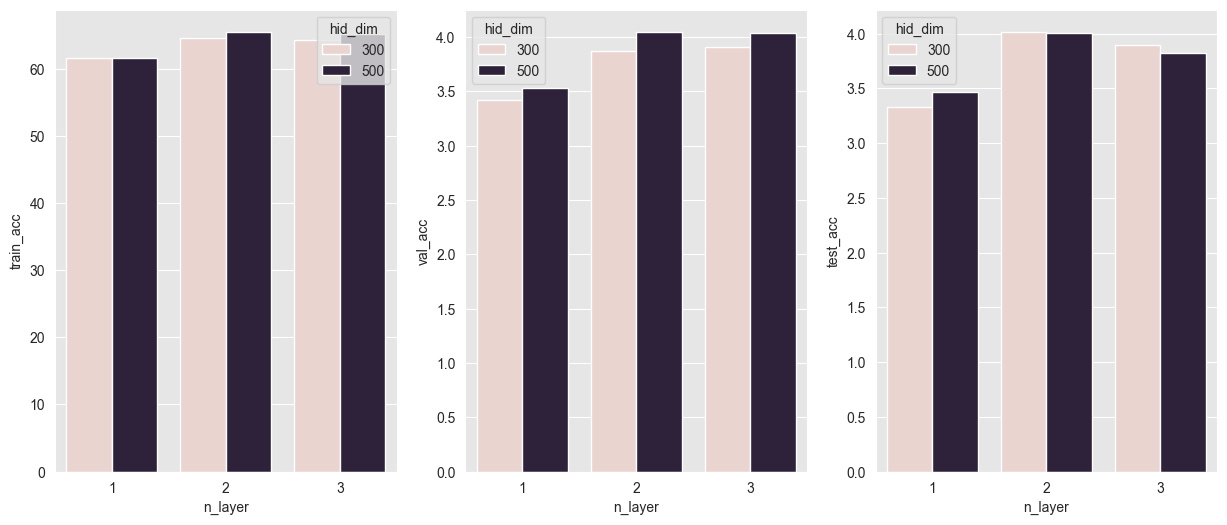

In [98]:
import seaborn as sns 
import matplotlib.pyplot as plt

df = load_exp_result('exp7')

fig, ax = plt.subplots(1, 3)
fig.set_size_inches(15, 6)
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

sns.barplot(x='n_layer', y='train_acc', hue='hid_dim', data=df, ax=ax[0])
sns.barplot(x='n_layer', y='val_acc', hue='hid_dim', data=df, ax=ax[1])
sns.barplot(x='n_layer', y='test_acc', hue='hid_dim', data=df, ax=ax[2])
plt.show()

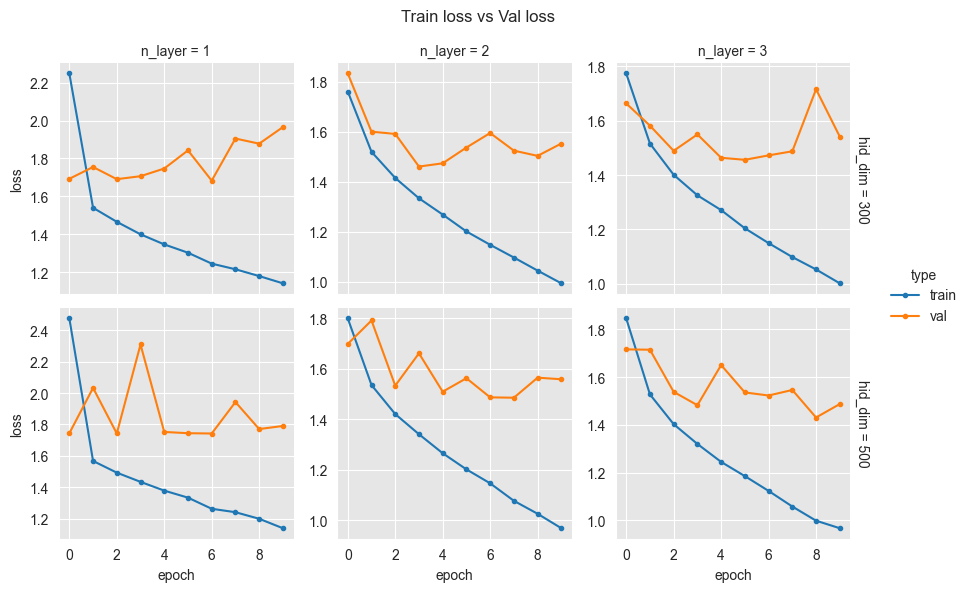

In [99]:
var1 = 'n_layer'
var2 = 'hid_dim'

df = load_exp_result('exp7')
list_v1 = df[var1].unique()
list_v2 = df[var2].unique()
list_data = []

for value1 in list_v1:
    for value2 in list_v2:
        row = df.loc[df[var1]==value1]
        row = row.loc[df[var2]==value2]
        
        train_losses = list(row.train_losses)[0]
        val_losses = list(row.val_losses)[0]
        
        for epoch, train_loss in enumerate(train_losses):
            list_data.append({'type':'train', 'loss':train_loss, 'epoch':epoch, var1:value1, var2:value2})
        for epoch, val_loss in enumerate(val_losses):
            list_data.append({'type':'val', 'loss':val_loss, 'epoch':epoch, var1:value1, var2:value2})
        
df = pd.DataFrame(list_data)
g = sns.FacetGrid(df, row=var2, col=var1, hue='type', margin_titles=True, sharey=False)
g = g.map(plt.plot, 'epoch', 'loss', marker='.')
g.add_legend()
g.fig.suptitle('Train loss vs Val loss')
plt.subplots_adjust(top=0.89)

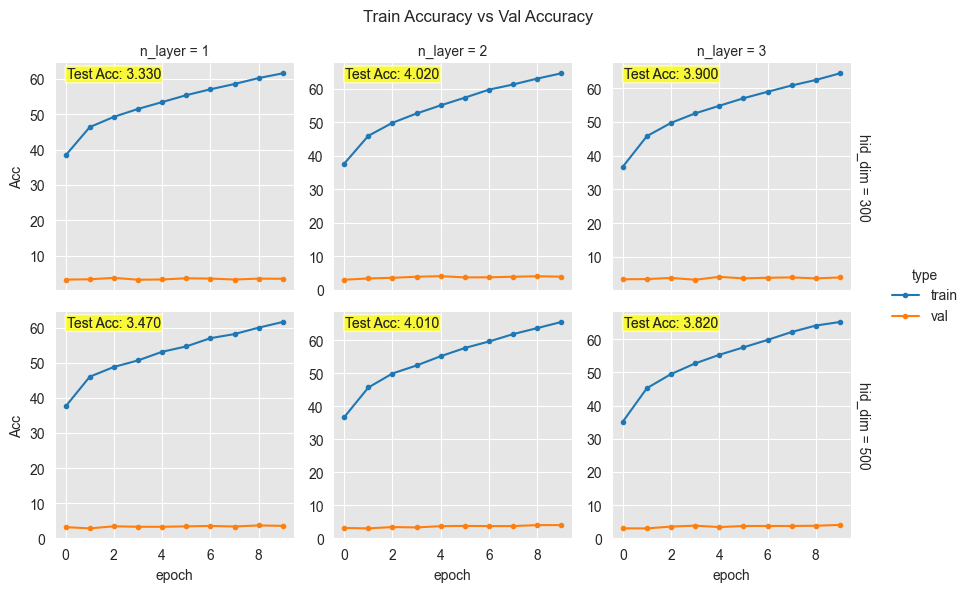

In [101]:
var1 = 'n_layer'
var2 = 'hid_dim'

df = load_exp_result('exp7')
list_v1 = df[var1].unique()
list_v2 = df[var2].unique()
list_data = []

for value1 in list_v1:
    for value2 in list_v2:
        row = df.loc[df[var1]==value1]
        row = row.loc[df[var2]==value2]
        
        train_accs = list(row.train_accs)[0]
        val_accs = list(row.val_accs)[0]
        test_acc = list(row.test_acc)[0]
        
        for epoch, train_acc in enumerate(train_accs):
            list_data.append({'type':'train', 'Acc':train_acc, 'test_acc':test_acc, 'epoch':epoch, var1:value1, var2:value2})
        for epoch, val_acc in enumerate(val_accs):
            list_data.append({'type':'val', 'Acc':val_acc, 'test_acc':test_acc, 'epoch':epoch, var1:value1, var2:value2})
        
df = pd.DataFrame(list_data)
g = sns.FacetGrid(df, row=var2, col=var1, hue='type', margin_titles=True, sharey=False)
g = g.map(plt.plot, 'epoch', 'Acc', marker='.')

def show_acc(x, y, metric, **kwargs):
    plt.scatter(x, y, alpha=0.3, s=1)
    metric = "Test Acc: {:1.3f}".format(list(metric.values)[0])
    plt.text(0.05, 0.95, metric,  horizontalalignment='left', verticalalignment='center', transform=plt.gca().transAxes, bbox=dict(facecolor='yellow', alpha=0.5, boxstyle="round,pad=0.1"))
g = g.map(show_acc, 'epoch', 'Acc', 'test_acc')

g.add_legend()
g.fig.suptitle('Train Accuracy vs Val Accuracy')



plt.subplots_adjust(top=0.89)

# 8. CIFAR10 with CNN

In [1]:
import torch
import torchvision
from torchvision import transforms 
from torch.utils.data import DataLoader, Dataset
from torch import nn 
import torch.nn.functional as F
from torch import optim 
import argparse
import numpy as np
import time
from copy import deepcopy 
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='../../data', train=True,
                                        download=True, transform=transform)
trainset, valset = torch.utils.data.random_split(trainset, [40000, 10000])
testset = torchvision.datasets.CIFAR10(root='../../data', train=False,
                                        download=True, transform=transform)
partition = {'train': trainset, 'val':valset, 'test':testset}

Files already downloaded and verified
Files already downloaded and verified


In [3]:
cfg = {
    'VGG11': [64, 'M', 128, 'M', 256, 256, 'M', 512, 512, 'M', 512, 512, 'M'],
    'VGG13': [64, 64, 'M', 128, 128, 'M', 256, 256, 'M', 512, 512, 'M', 512, 512, 'M'],
    'VGG16': [64, 64, 'M', 128, 128, 'M', 256, 256, 256, 'M', 512, 512, 512, 'M', 512, 512, 512, 'M'],
    'VGG19': [64, 64, 'M', 128, 128, 'M', 256, 256, 256, 256, 'M', 512, 512, 512, 512, 'M', 512, 512, 512, 512, 'M'],
}

In [4]:
class CNN(nn.Module):
    def __init__(self, model_code, in_channels, out_dim, act, use_bn):
        super(CNN, self).__init__()
        if act == 'relu':
            self.act = nn.ReLU()
        elif act == 'sigmoid':
            self.act = nn.Sigmoid()
        elif act == 'tanh':
            self.act = nn.Tanh()
        else:
            ValueError('Not a vaild activation function code')
        
        self.layers = self._make_layers(model_code, in_channels, use_bn)
        self.classifier = nn.Sequential(
            nn.Linear(512, 256),
            self.act,
            nn.Linear(256, out_dim)
        )

    def forward(self, x):
        x = self.layers(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x

    def _make_layers(self, model_code, in_cahnnels, use_bn):
        layers = []
        for x in cfg[model_code]:
            if x == 'M':
                layers += [nn.MaxPool2d(2, 2)]
            else:
                layers += [nn.Conv2d(in_cahnnels, x, 3, 1, 1)]
                if use_bn:
                    layers += [nn.BatchNorm2d(x)]
                layers += [self.act]
                in_cahnnels = x
        return nn.Sequential(*layers)

In [5]:
class CNN1(nn.Module):
    def __init__(self):
        super(CNN1, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, 3, 1, 1)
        self.conv2 = nn.Conv2d(64, 256, 5, 1, 2)
        self.act = nn.ReLU()
        self.maxpool = nn.MaxPool2d(2, 2)
        self.fc = nn.Linear(65536, 10)
    def forward(self, x):
        x = self.conv1(x)
        x = self.act(x)
        x = self.conv2(x)
        x = self.act(x)
        x = self.maxpool(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x

def dimension_check():
    net = CNN1()
    x = torch.randn(2, 3, 32, 32)
    print(net(x).size())

dimension_check()

torch.Size([2, 10])


In [6]:
def train(model, optimizer, criterion, device, args):
    trainloader = DataLoader(partition['train'], batch_size=args.train_batch_size,
                            shuffle=True)
    model.train()
    correct, train_loss = 0, 0.
    for i, (x, y) in enumerate(trainloader):
        optimizer.zero_grad()
        x, y = x.to(device), y.to(device)
        outputs = model(x)
        loss = criterion(outputs, y)        
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        pred = torch.argmax(outputs, 1)
        correct += (pred == y).sum().item()
    train_loss /= len(trainloader)
    train_acc = 100 * correct / len(trainloader.dataset)
    return model, train_loss, train_acc

def validate(model, criterion, device, args):
    valloader = DataLoader(partition['val'], batch_size=args.test_batch_size,
                            shuffle=True)
    model.eval()
    correct, val_loss = 0, 0.
    with torch.no_grad():
        for x, y in valloader:
            x, y = x.to(device), y.to(device)
            outputs = model(x)
            loss = criterion(outputs, y)

            val_loss += loss.item()
            pred = torch.argmax(outputs, 1)
            correct += (pred==y).sum().item()
        val_loss /= len(valloader)
        val_acc = 100*correct / len(valloader.dataset)
    return val_loss, val_acc

def test(model, device, args):
    testloader = DataLoader(partition['test'], batch_size=args.test_batch_size,
                            shuffle=True)
    model.eval()
    correct = 0
    with torch.no_grad():
        for x, y in testloader:
            x, y = x.to(device), y.to(device)
            outputs = model(x)

            pred = torch.argmax(outputs, 1)
            correct += (pred==y).sum().item()
        test_acc = 100*correct / len(testloader.dataset)
    return test_acc
        

In [7]:
def experiment(args):
    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    model = CNN(model_code = args.model_code,
                in_channels = args.in_channels,
                out_dim = args.out_dim,
                act = args.act,
                use_bn = args.use_bn).to(device)
    criterion = nn.CrossEntropyLoss()
    if args.optim == 'SGD':
        optimizer = optim.SGD(model.parameters(), lr=args.lr, weight_decay=args.l2)
    elif args.optim == 'RMSprop':
        optimizer = optim.RMSprop(model.parameters(), lr=args.lr, weight_decay=args.l2)
    elif args.optim == 'Adam':
        optimizer = optim.Adam(model.parameters(), lr=args.lr, weight_decay=args.l2)
    else:
        raise ValueError('In-valid optimizer choice')
    
    result = {'train_losses' : [],
            'val_losses' : [],
            'train_accs' : [], 
            'val_accs': [],
            'train_acc': 0,
            'val_acc' : 0,
            'test_acc': 0}
    
    for epoch in range(args.epochs):
        ts = time.time()
        model, train_loss, train_acc = train(model, optimizer, criterion, device, args)
        val_loss, val_acc = validate(model, criterion, device, args)
        te = time.time()

        result['train_losses'].append(train_loss)
        result['val_losses'].append(val_loss)
        result['train_accs'].append(train_acc)
        result['val_accs'].append(val_acc)

        print('Epoch {} Acc(train/val) : {:2.2f} / {:2.2f}\t | Loss(train/val) : {:2.2f} / {:2.2f}\t | Took : {:2.2f} sec'.format(epoch+1, train_acc, val_acc, train_loss, val_loss, te-ts))
    test_acc = test(model, device, args)
    result['train_acc'] = train_acc
    result['val_acc'] = val_acc
    result['test_acc'] = test_acc
    return vars(args), result
        
    


In [8]:
import hashlib
import json
import os
import pandas as pd

def save_exp_result(setting, result):
    exp_name = setting['exp_name']
    del setting['epochs']
    del setting['train_batch_size']
    os.makedirs('results/{}'.format(exp_name[:4]), exist_ok=True)
    hash_key = hashlib.sha1(str(setting).encode()).hexdigest()[:6]
    filename = './results/{}/{}-{}.json'.format(exp_name[:4], exp_name, hash_key)
    result.update(setting)
    with open(filename, 'w') as f:
        json.dump(result, f)

def load_exp_result(exp_name):
    dir_path = './results/{}/'.format(exp_name)
    filenames = [f for f in os.listdir(dir_path) if os.path.isfile(os.path.join(dir_path, f))
                if '.json' in f]
    list_result = []
    for filename in filenames:
        if exp_name in filename:
            with open(os.path.join(dir_path, filename), 'r') as infile:
                results = json.load(infile)
                list_result.append(results)
    return pd.DataFrame(list_result)

In [204]:

# ====== Random Seed Initialization ====== #
seed = 123
np.random.seed(seed)
torch.manual_seed(seed)

parser = argparse.ArgumentParser()
args = parser.parse_args("")
args.exp_name = "exp8_lr_model_code"

# ====== Model ====== #
args.model_code = 'VGG16'
args.in_channels = 3
args.out_dim = 10
args.act = 'relu'

# ====== Regularization ======= #
args.l2 = 0.00001
args.use_bn = True

# ====== Optimizer & Training ====== #
args.optim = 'RMSprop' #'RMSprop' #SGD, RMSprop, ADAM...
args.lr = 0.0015
args.epochs = 10

args.train_batch_size = 256
args.test_batch_size = 1024

# ====== Experiment Variable ====== #
name_var1 = 'lr'
name_var2 = 'model_code'
list_var1 = [0.0001, 0.00001]
list_var2 = ['VGG11', 'VGG13']


for var1 in list_var1:
    for var2 in list_var2:
        setattr(args, name_var1, var1)
        setattr(args, name_var2, var2)
        print(args)
                
        setting, result = experiment(deepcopy(args))
        save_exp_result(setting, result)

Namespace(exp_name='exp8_lr_model_code', model_code='VGG11', in_channels=3, out_dim=10, act='relu', l2=1e-05, use_bn=True, optim='RMSprop', lr=0.0001, epochs=10, train_batch_size=256, test_batch_size=1024)
Epoch 1 Acc(train/val) : 51.29 / 50.05	 | Loss(train/val) : 1.32 / 1.47	 | Took : 9.44 sec
Epoch 2 Acc(train/val) : 70.90 / 59.07	 | Loss(train/val) : 0.81 / 1.26	 | Took : 9.33 sec
Epoch 3 Acc(train/val) : 79.72 / 54.00	 | Loss(train/val) : 0.58 / 1.62	 | Took : 9.30 sec
Epoch 4 Acc(train/val) : 86.95 / 55.87	 | Loss(train/val) : 0.38 / 2.01	 | Took : 9.16 sec
Epoch 5 Acc(train/val) : 92.61 / 62.01	 | Loss(train/val) : 0.22 / 1.65	 | Took : 9.24 sec
Epoch 6 Acc(train/val) : 95.53 / 58.12	 | Loss(train/val) : 0.13 / 2.03	 | Took : 9.31 sec
Epoch 7 Acc(train/val) : 96.83 / 68.07	 | Loss(train/val) : 0.09 / 1.49	 | Took : 9.22 sec
Epoch 8 Acc(train/val) : 97.12 / 54.11	 | Loss(train/val) : 0.09 / 2.98	 | Took : 9.33 sec
Epoch 9 Acc(train/val) : 97.65 / 71.01	 | Loss(train/val) : 0.07 /

In [13]:
def plot_acc(var1, var2, df):
    fig, ax = plt.subplots(3)
    fig.set_size_inches(15, 6)
    sns.set_style('darkgrid',  {'axes.facecolor':".9"})

    sns.barplot(x=var1, y='train_acc', hue=var2, data=df, ax=ax[0])
    sns.barplot(x=var1, y='val_acc', hue=var2, data=df, ax=ax[1])
    sns.barplot(x=var1, y='test_acc', hue=var2, data=df, ax=ax[2])

    ax[0].set_title('Train Accuracy')
    ax[1].set_title('Validation Accuracy')
    ax[2].set_title('Test Accuracy')
    plt.show()

def plot_loss_variation(var1, var2, df, **kwargs):
    list_v1 = df[var1].unique()
    list_v2 = df[var2].unique()
    list_data = []
    for value1 in list_v1:
        for value2 in list_v2:
            row = df.loc[df[var1]==value1]
            row = row.loc[df[var2]==value2]
            train_losses = list(row.train_losses)[0]
            val_losses = list(row.val_losses)[0]

            for epoch, train_loss in enumerate(train_losses):
                list_data.append({'type':'train', 'loss':train_loss, 'epoch' : epoch, var1:value1, var2:value2})
            for epoch, val_loss in enumerate(val_losses):
                list_data.append({'type':'val', 'loss':val_loss, 'epoch':epoch, var1:value1, var2:value2})
    df = pd.DataFrame(list_data)
    g = sns.FacetGrid(df, row=var2, col=var1, hue='type', **kwargs)
    g = g.map(plt.plot, 'epoch', 'loss', marker='.')
    g.add_legend()
    g.fig.suptitle('Train loss vs Val loss')
    plt.subplots_adjust(top=0.89)
    
def plot_acc_variation(var1, var2, df, **kwargs):
    list_v1 = df[var1].unique()
    list_v2 = df[var2].unique()
    list_data = []

    for value1 in list_v1:
        for value2 in list_v2:
            row = df.loc[df[var1]==value1]
            row = row.loc[df[var2]==value2]

            train_accs = list(row.train_accs)[0]
            val_accs = list(row.val_accs)[0]
            test_acc = list(row.test_acc)[0]

            for epoch, train_acc in enumerate(train_accs):
                list_data.append({'type':'train', 'Acc':train_acc, 'test_acc':test_acc, 'epoch':epoch, var1:value1, var2:value2})
            for epoch, val_acc in enumerate(val_accs):
                list_data.append({'type':'val', 'Acc':val_acc, 'test_acc':test_acc, 'epoch':epoch, var1:value1, var2:value2})

    df = pd.DataFrame(list_data)
    g = sns.FacetGrid(df, row=var2, col=var1, hue='type', **kwargs)
    g = g.map(plt.plot, 'epoch', 'Acc', marker='.')

    def show_acc(x, y, metric, **kwargs):
        plt.scatter(x, y, alpha=0.3, s=1)
        metric = "Test Acc: {:1.3f}".format(list(metric.values)[0])
        plt.text(0.05, 0.95, metric,  horizontalalignment='left', verticalalignment='center', transform=plt.gca().transAxes, bbox=dict(facecolor='yellow', alpha=0.5, boxstyle="round,pad=0.1"))
    g = g.map(show_acc, 'epoch', 'Acc', 'test_acc')

    g.add_legend()
    g.fig.suptitle('Train Accuracy vs Val Accuracy')
    plt.subplots_adjust(top=0.89)



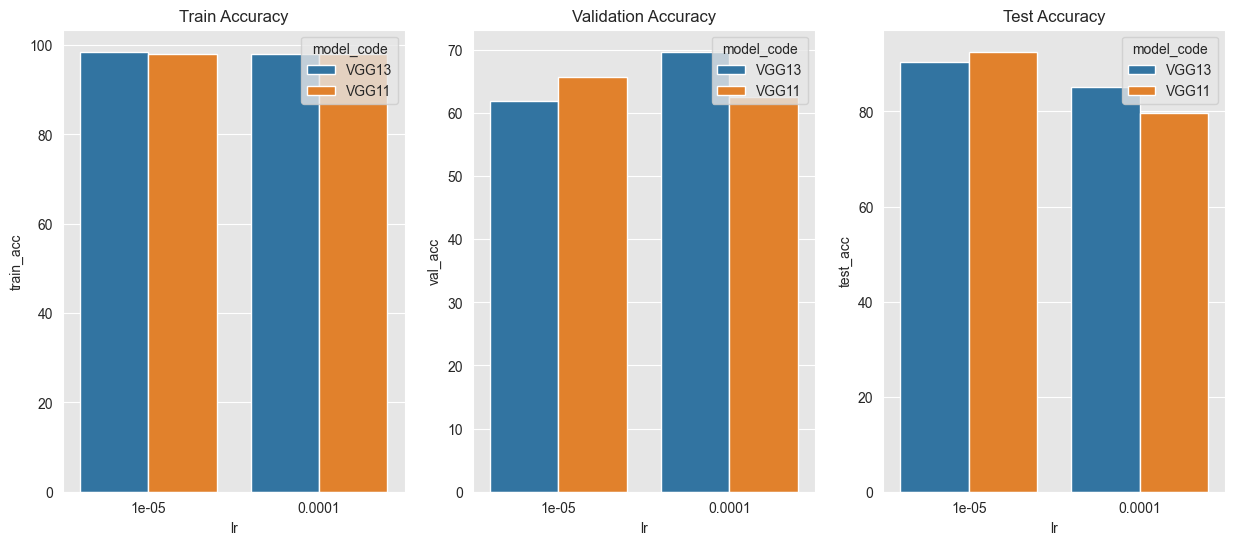

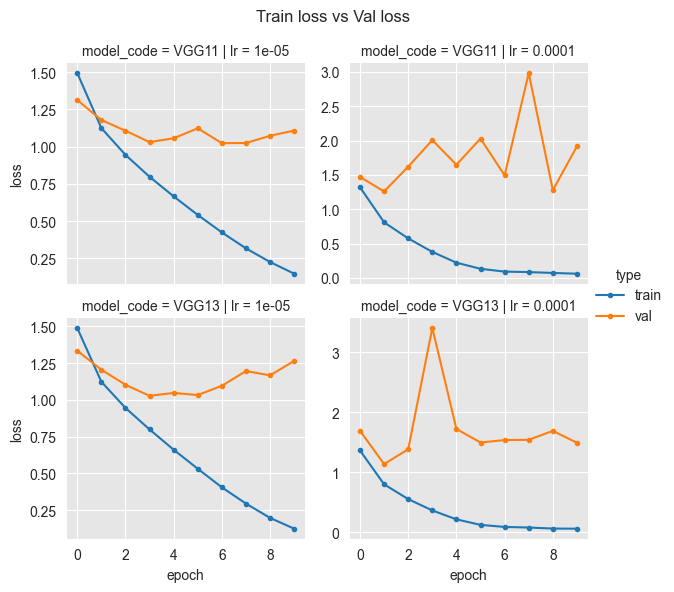

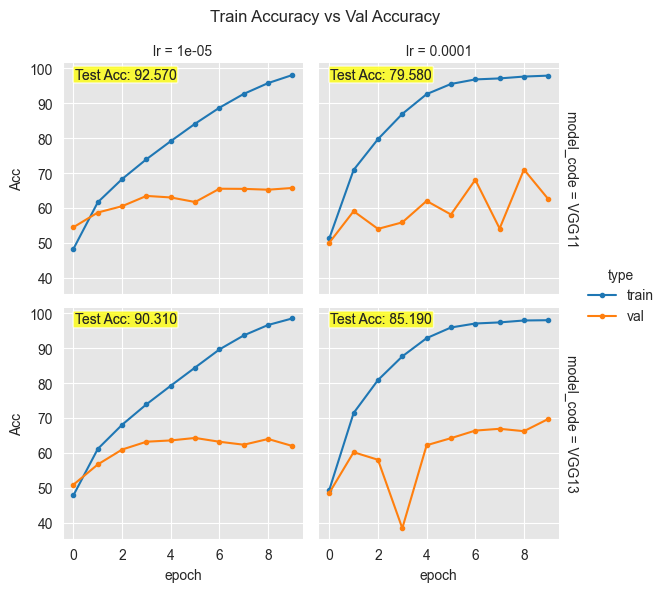

In [47]:
var1 = 'lr'
var2 = 'model_code'
df = load_exp_result('exp8')

plot_acc(var1, var2, df)
plot_loss_variation(var1, var2, df, sharey=False)
plot_acc_variation(var1, var2, df, margin_titles=True, sharey=True)

# 9. CIFAR-100 Classification with ResNet

In [15]:
import torch
from torch.utils.data import Dataset, DataLoader
from torch import nn, optim
import torchvision
from torchvision import transforms
from torchvision import datasets
import torch.nn.functional as F
import argparse, time, os
import numpy as np
from copy import deepcopy
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])
trainset = datasets.CIFAR100(root='../../data/', 
                             download=True,
                             train=True,
                             transform=transform)
testset = datasets.CIFAR100(root='../../data/',
                            download=True,
                            train=False,
                            transform= transform)
trainset, valset = torch.utils.data.random_split(trainset, [40000, 10000])

partition = {'train' : trainset, 'val' : valset, 'test' : testset}

Files already downloaded and verified
Files already downloaded and verified


In [17]:
def conv3x3(in_places, out_places, stride=1):
    return nn.Conv2d(in_places, out_places, 3, stride, 1, bias=False)

def conv1x1(in_places, out_places, stride=1):
    return nn.Conv2d(in_places, out_places, 1, stride, bias=False)

In [18]:
# BasicBlock Module 
# 3*3 : 2 + skip connection

class BasicBlock(nn.Module):
    expansion = 1
    
    def __init__(self, inplanes, planes, stride=1, downsample=None):
        self.conv1 = conv3x3(inplanes, planes, stride)
        self.bn1 = nn.BatchNorm2d(planes)
        self.relu = nn.ReLU(inplace=True)
        self.conv2 = conv3x3(planes, planes)
        self.bn2 = nn.BatchNorm2d(planes)
        self.downsample = downsample
        self.stride = stride
    
    def forward(self, x):
        identity = x

        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)
        out = self.conv2(out)
        out = self.bn2(out)

        if self.downsample is not None:
            identity = self.downsample(x)
        
        out += identity
        out = self.relu(out)
        return out

In [19]:
# Bottleneck Module
# 3x3 convolution layer 앞뒤로 1x1 convolution layer를 추가한 Bottleneck module

class Bottleneck(nn.Module):
    expansion = 4

    def __init__(self, inplanes, planes, stride=1, downsample=None):
        super(Bottleneck, self).__init__()
        self.conv1 = conv1x1(inplanes, planes)
        self.bn1 = nn.BatchNorm2d(planes)
        self.conv2 = conv3x3(planes, planes, stride)
        self.bn2 = nn.BatchNorm2d(planes)
        self.conv3 = conv1x1(planes, planes*self.expansion)
        self.bn3 = nn.BatchNorm2d(planes*self.expansion)
        self.relu = nn.ReLU(inplace=True)
        self.stride = stride
        self.downsample = downsample

    def forward(self, x):
        identity = x 
        
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)
        out = self.conv2(out)
        out = self.bn2(out)
        out = self.relu(out)
        out = self.conv3(out)
        out = self.bn3(out)

        if self.downsample is not None:
            identity = self.downsample(x)

        out += identity
        out = self.relu(out)
        return out

In [20]:
# ResNet Module

class ResNet(nn.Module):
    def __init__(self, block, layers, num_classes=1000, zero_init_residual=False):
        super(ResNet, self).__init__()
        self.inplanes = 64
        self.conv1 = nn.Conv2d(3, 64, 7, 2, 3, bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        self.relu = nn.ReLU(inplace=True)
        self.maxpool = nn.MaxPool2d(3, 2, 1)
        self.layer1 = self._make_layer(block, 64, layers[0])
        self.layer2 = self._make_layer(block, 128, layers[0], stride=2)
        self.layer3 = self._make_layer(block, 256, layers[0], stride=2)
        self.layer4 = self._make_layer(block, 512, layers[0], stride=2)
        self.avgpool = nn.AdaptiveAvgPool2d((1,1))
        self.fc = nn.Linear(512*block.expansion, num_classes)

        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
            elif isinstance(m, nn.BatchNorm2d):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)
        
        if zero_init_residual:
            for m in self.modules:
                if isinstance(m, Bottleneck):
                    nn.init.constant_(m.bn3.weight, 0)
                elif isinstance(m, BasicBlock):
                    nn.init.constant_(m.bn2.weight, 0)
        
    
    def _make_layer(self, block, planes, blocks, stride=1):
        downsample = None
        if stride != 1 or self.inplanes != planes * block.expansion:
            downsample = nn.Sequential(
                conv1x1(self.inplanes, planes*block.expansion, stride),
                nn.BatchNorm2d(planes * block.expansion)
            )
        layers = []
        layers.append(block(self.inplanes, planes, stride, downsample))
        self.inplanes = planes * block.expansion
        for _ in range(1, blocks):
            layers.append(block(self.inplanes, planes))
        
        return nn.Sequential(*layers)
    
    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)

        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)

        x = self.avgpool(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)

        return x


In [33]:
def train(model, optimizer, criterion, device, args):
    trainloader = DataLoader(partition['train'], batch_size=args.train_batch_size,
                            shuffle=True)
    model.train()
    correct, train_loss = 0, 0.
    for i, (x, y) in enumerate(trainloader):
        optimizer.zero_grad()
        x, y = x.to(device), y.to(device)
        outputs = model(x)
        loss = criterion(outputs, y)        
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        pred = torch.argmax(outputs, 1)
        correct += (pred == y).sum().item()
    train_loss /= len(trainloader)
    train_acc = 100 * correct / len(trainloader.dataset)
    return model, train_loss, train_acc

def validate(model, criterion, device, args):
    valloader = DataLoader(partition['val'], batch_size=args.test_batch_size,
                            shuffle=True)
    model.eval()
    correct, val_loss = 0, 0.
    with torch.no_grad():
        for x, y in valloader:
            x, y = x.to(device), y.to(device)
            outputs = model(x)
            loss = criterion(outputs, y)

            val_loss += loss.item()
            pred = torch.argmax(outputs, 1)
            correct += (pred==y).sum().item()
        val_loss /= len(valloader)
        val_acc = 100*correct / len(valloader.dataset)
    return val_loss, val_acc

def test(model, device, args):
    testloader = DataLoader(partition['test'], batch_size=args.test_batch_size,
                            shuffle=True)
    model.eval()
    correct = 0
    with torch.no_grad():
        for x, y in testloader:
            x, y = x.to(device), y.to(device)
            outputs = model(x)

            pred = torch.argmax(outputs, 1)
            correct += (pred==y).sum().item()
        test_acc = 100*correct / len(testloader.dataset)
    return test_acc
        

In [34]:
def experiment(args):
    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    model = ResNet(Bottleneck, args.layers).to(device)
    criterion = nn.CrossEntropyLoss()
    if args.optim == 'SGD':
        optimizer = optim.SGD(model.parameters(), lr=args.lr, weight_decay=args.l2)
    elif args.optim == 'RMSprop':
        optimizer = optim.RMSprop(model.parameters(), lr=args.lr, weight_decay=args.l2)
    elif args.optim == 'Adam':
        optimizer = optim.Adam(model.parameters(), lr=args.lr, weight_decay=args.l2)
    else:
        raise ValueError('In-valid optimizer choice')
    
    result = {'train_losses' : [],
            'val_losses' : [],
            'train_accs' : [], 
            'val_accs': [],
            'train_acc': 0,
            'val_acc' : 0,
            'test_acc': 0}
    
    for epoch in range(args.epochs):
        ts = time.time()
        model, train_loss, train_acc = train(model, optimizer, criterion, device, args)
        val_loss, val_acc = validate(model, criterion, device, args)
        te = time.time()

        result['train_losses'].append(train_loss)
        result['val_losses'].append(val_loss)
        result['train_accs'].append(train_acc)
        result['val_accs'].append(val_acc)

        print('Epoch {} Acc(train/val) : {:2.2f} / {:2.2f}\t | Loss(train/val) : {:2.2f} / {:2.2f}\t | Took : {:2.2f} sec'.format(epoch+1, train_acc, val_acc, train_loss, val_loss, te-ts))
    test_acc = test(model, device, args)
    result['train_acc'] = train_acc
    result['val_acc'] = val_acc
    result['test_acc'] = test_acc
    return vars(args), result   
    


In [35]:
import hashlib
import json
import os
import pandas as pd

def save_exp_result(setting, result):
    exp_name = setting['exp_name']
    del setting['epochs']
    del setting['train_batch_size']
    os.makedirs('results/{}'.format(exp_name[:4]), exist_ok=True)
    hash_key = hashlib.sha1(str(setting).encode()).hexdigest()[:6]
    filename = './results/{}/{}-{}.json'.format(exp_name[:4], exp_name, hash_key)
    result.update(setting)
    with open(filename, 'w') as f:
        json.dump(result, f)

def load_exp_result(exp_name):
    dir_path = './results/{}/'.format(exp_name)
    filenames = [f for f in os.listdir(dir_path) if os.path.isfile(os.path.join(dir_path, f))
                if '.json' in f]
    list_result = []
    for filename in filenames:
        if exp_name in filename:
            with open(os.path.join(dir_path, filename), 'r') as infile:
                results = json.load(infile)
                list_result.append(results)
    return pd.DataFrame(list_result)

In [41]:
def plot_acc(var1, var2, df):

    fig, ax = plt.subplots(1, 3)
    fig.set_size_inches(15, 6)
    sns.set_style("darkgrid", {"axes.facecolor": ".9"})

    sns.barplot(x=var1, y='train_acc', hue=var2, data=df, ax=ax[0])
    sns.barplot(x=var1, y='val_acc', hue=var2, data=df, ax=ax[1])
    sns.barplot(x=var1, y='test_acc', hue=var2, data=df, ax=ax[2])
    
    ax[0].set_title('Train Accuracy')
    ax[1].set_title('Validation Accuracy')
    ax[2].set_title('Test Accuracy')
    
def plot_loss_variation(var1, var2, df, **kwargs):

    list_v1 = df[var1].unique()
    list_v2 = df[var2].unique()
    list_data = []

    for value1 in list_v1:
        for value2 in list_v2:
            row = df.loc[df[var1]==value1]
            row = row.loc[df[var2]==value2]

            train_losses = list(row.train_losses)[0]
            val_losses = list(row.val_losses)[0]

            for epoch, train_loss in enumerate(train_losses):
                list_data.append({'type':'train', 'loss':train_loss, 'epoch':epoch, var1:value1, var2:value2})
            for epoch, val_loss in enumerate(val_losses):
                list_data.append({'type':'val', 'loss':val_loss, 'epoch':epoch, var1:value1, var2:value2})

    df = pd.DataFrame(list_data)
    g = sns.FacetGrid(df, row=var2, col=var1, hue='type', **kwargs)
    g = g.map(plt.plot, 'epoch', 'loss', marker='.')
    g.add_legend()
    g.fig.suptitle('Train loss vs Val loss')
    plt.subplots_adjust(top=0.89) # 만약 Title이 그래프랑 겹친다면 top 값을 조정해주면 됩니다! 함수 인자로 받으면 그래프마다 조절할 수 있겠죠?
    
def plot_acc_variation(var1, var2, df, **kwargs):
    list_v1 = df[var1].unique()
    list_v2 = df[var2].unique()
    list_data = []

    for value1 in list_v1:
        for value2 in list_v2:
            row = df.loc[df[var1]==value1]
            row = row.loc[df[var2]==value2]

            train_accs = list(row.train_accs)[0]
            val_accs = list(row.val_accs)[0]
            test_acc = list(row.test_acc)[0]

            for epoch, train_acc in enumerate(train_accs):
                list_data.append({'type':'train', 'Acc':train_acc, 'test_acc':test_acc, 'epoch':epoch, var1:value1, var2:value2})
            for epoch, val_acc in enumerate(val_accs):
                list_data.append({'type':'val', 'Acc':val_acc, 'test_acc':test_acc, 'epoch':epoch, var1:value1, var2:value2})

    df = pd.DataFrame(list_data)
    g = sns.FacetGrid(df, row=var2, col=var1, hue='type', **kwargs)
    g = g.map(plt.plot, 'epoch', 'Acc', marker='.')

    def show_acc(x, y, metric, **kwargs):
        plt.scatter(x, y, alpha=0.3, s=1)
        metric = "Test Acc: {:1.3f}".format(list(metric.values)[0])
        plt.text(0.05, 0.95, metric,  horizontalalignment='left', verticalalignment='center', transform=plt.gca().transAxes, bbox=dict(facecolor='yellow', alpha=0.5, boxstyle="round,pad=0.1"))
    g = g.map(show_acc, 'epoch', 'Acc', 'test_acc')

    g.add_legend()
    g.fig.suptitle('Train Accuracy vs Val Accuracy')
    plt.subplots_adjust(top=0.89)

In [38]:
seed = 123
np.random.seed(seed)
torch.manual_seed(seed)

parser = argparse.ArgumentParser()
args = parser.parse_args("")
args.exp_name = "exp9_testing_optim&lr"


args.optim = 'RMSprop'
args.lr = 0.0001
args.l2 = 0.00001
args.epochs = 30
args.layers = [3, 8, 36, 3]

args.train_batch_size = 512
args.test_batch_size = 1024

name_var1 = 'optim'
name_var2 = 'lr'
list_var1 = ['SGD', 'Adam']
list_var2 = [0.01]


for var1 in list_var1:
    for var2 in list_var2:
        setattr(args, name_var1, var1)
        setattr(args, name_var2, var2)
        print(args)
                
        setting, result = experiment(deepcopy(args))
        save_exp_result(setting, result)

Namespace(exp_name='exp9_testing_optim&lr', optim='SGD', lr=0.01, l2=1e-05, epochs=30, layers=[3, 8, 36, 3], train_batch_size=512, test_batch_size=1024)
Epoch 1 Acc(train/val) : 1.53 / 1.73	 | Loss(train/val) : 5.22 / 4.99	 | Took : 7.49 sec
Epoch 2 Acc(train/val) : 2.98 / 2.74	 | Loss(train/val) : 4.62 / 4.67	 | Took : 7.38 sec
Epoch 3 Acc(train/val) : 5.22 / 4.34	 | Loss(train/val) : 4.37 / 4.39	 | Took : 7.42 sec
Epoch 4 Acc(train/val) : 7.38 / 6.06	 | Loss(train/val) : 4.15 / 4.22	 | Took : 7.44 sec
Epoch 5 Acc(train/val) : 9.73 / 8.34	 | Loss(train/val) : 3.99 / 4.06	 | Took : 7.61 sec
Epoch 6 Acc(train/val) : 11.79 / 9.73	 | Loss(train/val) : 3.85 / 3.96	 | Took : 7.87 sec
Epoch 7 Acc(train/val) : 14.29 / 10.78	 | Loss(train/val) : 3.70 / 3.93	 | Took : 7.48 sec
Epoch 8 Acc(train/val) : 16.56 / 11.75	 | Loss(train/val) : 3.57 / 3.82	 | Took : 7.54 sec
Epoch 9 Acc(train/val) : 19.39 / 13.37	 | Loss(train/val) : 3.43 / 3.76	 | Took : 7.68 sec
Epoch 10 Acc(train/val) : 21.97 / 13.71

In [49]:
df

train_losses  \
0  [5.408971351913259, 4.05741352069227, 3.799603...   
1  [5.222731523875948, 4.622411878803108, 4.36753...   

                                          val_losses  \
0  [4.913403129577636, 3.9983288049697876, 3.7950...   
1  [4.987038421630859, 4.668615627288818, 4.39377...   

                                          train_accs  \
0  [2.6125, 6.935, 10.27, 13.96, 17.25, 21.21, 24...   
1  [1.53, 2.98, 5.2225, 7.3825, 9.73, 11.785, 14....   

                                            val_accs  train_acc  val_acc  \
0  [3.98, 8.36, 10.98, 13.14, 18.03, 21.04, 24.18...    85.2925    34.04   
1  [1.73, 2.74, 4.34, 6.06, 8.34, 9.73, 10.78, 11...    88.2050    15.44   

   test_acc               exp_name optim    lr       l2         layers  \
0     35.13  exp9_testing_optim&lr  Adam  0.01  0.00001  [3, 8, 36, 3]   
1     15.45  exp9_testing_optim&lr   SGD  0.01  0.00001  [3, 8, 36, 3]   

   test_batch_size  
0             1024  
1             1024

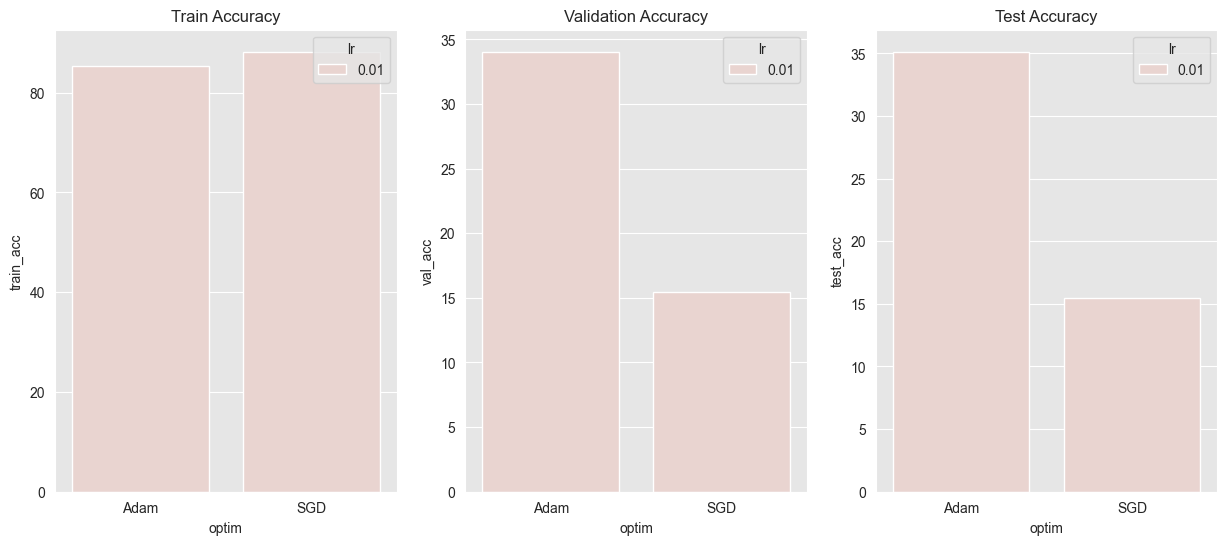

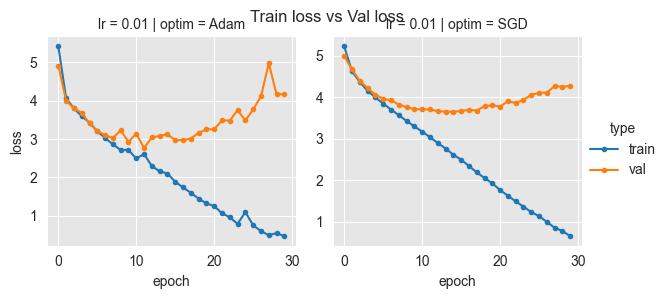

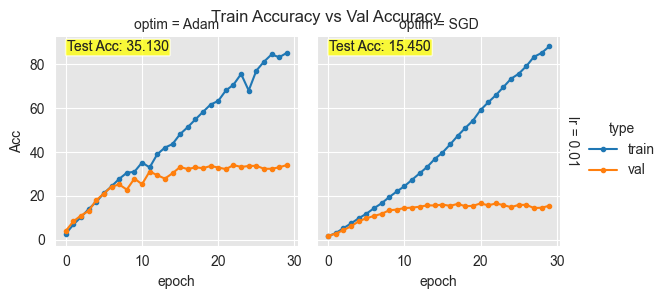

In [50]:
var1 = 'optim'
var2 = 'lr'
df = load_exp_result('exp9')

plot_acc(var1, var2, df)
plot_loss_variation(var1, var2, df, sharey=False)
plot_acc_variation(var1, var2, df, margin_titles=True, sharey=True)

# 10. Learn Trigonometric with RNN

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from torch import optim

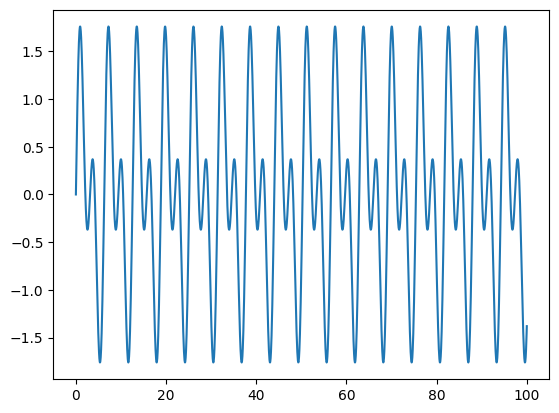

In [28]:
# generate dataset
num_data = 2400
t = np.linspace(0.0, 100.0, num_data)
y = np.sin(t) + np.sin(2*t)
e = np.random.normal(0, 0.1, num_data)

seq_len = 10
x = []
y_true = []
for i in range(len(t) - seq_len):
    x.append(y[i : i+seq_len])
    y_true.append(y[i + seq_len])

x = np.array(x)
y_true = np.array(y_true)

x = np.swapaxes(x, 0, 1)
x = np.expand_dims(x, axis=2)

plt.plot(t, y)

In [29]:
import torch
from torch import nn

class RNN(nn.Module):
    def __init__(self, input_dim, output_dim, hid_dim, batch_size):
        super(RNN, self).__init__()

        self.input_dim = input_dim
        self.output_dim = output_dim
        self.hid_dim = hid_dim
        self.batch_size = batch_size
        self.u = nn.Linear(self.input_dim, self.hid_dim, bias=False)
        self.w = nn.Linear(self.hid_dim, self.hid_dim, bias=False)
        self.v = nn.Linear(self.hid_dim, self.output_dim, bias=False)
        self.act = nn.Tanh()

        self.hiddin = self.init_hidden()

    def forward(self, x):
        h = self.act(self.u(x) + self.w(self.hidden))
        y = self.v(h)
        return y, h
    
    def init_hidden(self, batch_size=None):
        if batch_size is None:
            batch_size = self.batch_size
        return torch.zeros(batch_size, self.hid_dim)
    
a = RNN(1, 1, 50, 2390)
print(a)
    


RNN(
  (u): Linear(in_features=1, out_features=50, bias=False)
  (w): Linear(in_features=50, out_features=50, bias=False)
  (v): Linear(in_features=50, out_features=1, bias=False)
  (act): Tanh()
)


In [30]:
model = RNN(1, 1, 50, 2390)
loss_fn = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.005)
epochs = 100

for epoch in range(epochs):
    model.train()
    model.zero_grad()
    optimizer.zero_grad()

    model.hidden = model.init_hidden()

    for ip in x:      
        ip = torch.Tensor(ip).float()
        y_true = torch.Tensor(y_true).float()

        y_pred, hidden = model(ip)
        model.hidden = hidden
    loss = loss_fn(y_pred.view(-1), y_true.view(-1))
    loss.backward()
    optimizer.step()
    print(loss.item())


0.6220493912696838
0.5021358728408813
0.4059392511844635
0.3287869691848755
0.26694023609161377
0.21739664673805237
0.1777394562959671
0.1460215002298355
0.12067335844039917
0.10043059289455414
0.08427520841360092
0.07138852775096893
0.06111284717917442
0.05292059853672981
0.046389080584049225
0.041180092841386795
0.0370233990252018
0.033703286200761795
0.031047817319631577
0.028920046985149384
0.027211030945181847
0.02583417296409607
0.02472069300711155
0.023815995082259178
0.023076782003045082
0.022468727082014084
0.021964630112051964
0.021542957052588463
0.021186653524637222
0.020882217213511467
0.020618975162506104
0.02038847841322422
0.020184041932225227
0.020000383257865906
0.01983332261443138
0.01967955380678177
0.019536463543772697
0.019401980563998222
0.019274475052952766
0.019152646884322166
0.019035475328564644
0.018922144547104836
0.018812015652656555
0.018704578280448914
0.01859942264854908
0.018496235832571983
0.018394755199551582
0.01829478144645691
0.018196143209934235


In [24]:
test_X.shape

(10, 1, 1)

In [32]:
x[:, 0, :].shape

(10, 1)

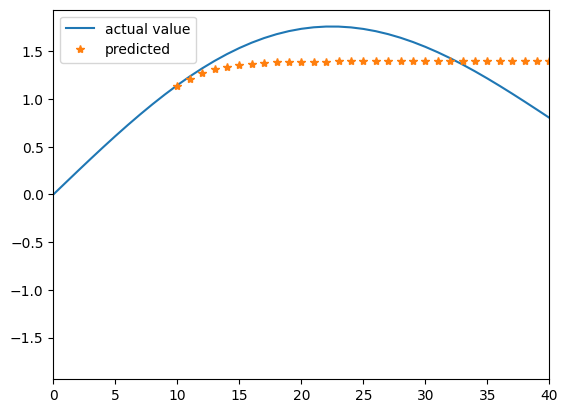

In [33]:
test_X = np.expand_dims(x[:, 0, :], 1)

list_y_pred = []

model.eval()
with torch.no_grad():
    model.hidden = model.init_hidden(batch_size=1)

    for ip in test_X:
        ip = torch.Tensor(ip).float()
        y_pred, hidden = model(ip)
        model.hidden = hidden
    list_y_pred.append(y_pred.view(-1).item())
    
    temp_X = list()
    temp_X += list(np.squeeze(test_X))[1:]
    temp_X.append(y_pred.view(-1).item())
    for i in range(2389):
        model.hidden = model.init_hidden(batch_size=1)
        
        temp2_X = torch.unsqueeze(torch.unsqueeze(torch.Tensor(temp_X), 1), 1)
        
        for ip in temp2_X:
            y_pred, hidden = model(ip)
            model.hidden = hidden
        list_y_pred.append(y_pred.view(-1).item())
        
        temp_X.append(y_pred.view(-1).item())
        temp_X.pop(0)

plt.plot(y, label='actual value')
plt.plot(list(range(10, 2400)), list_y_pred, '*', label='predicted')
plt.xlim(0, 40)
plt.legend()

# 11. Stock Price Prediction with LSTM

In [79]:
import pandas as pd
import numpy as np
import pandas_datareader.data as pdr
import datetime, torch, argparse
from torch import nn, optim
from torch.utils.data import DataLoader, Dataset
from copy import deepcopy
import matplotlib.pyplot as plt
import yfinance as yf 
yf.pdr_override()


In [78]:
start = datetime.datetime(*(2000,1,1))
start = start.strftime('%Y-%m-%d')
end = datetime.datetime(*(2000,11,30))
ensd = end.strftime('%Y-%m-%d')

google = pdr.get_data_yahoo('028050.KS', start, end)
google

[*********************100%%**********************]  1 of 1 completed


Open    High     Low   Close    Adj Close   Volume
Date                                                            
2000-01-04  6920.0  7990.0  6920.0  7990.0  6161.290527   508900
2000-01-05  7990.0  8900.0  7500.0  8250.0  6361.782715  1938100
2000-01-06  8490.0  8580.0  7320.0  7480.0  5768.017090   862800
2000-01-07  7510.0  8300.0  7350.0  8060.0  6215.270020  1315200
2000-01-10  8320.0  8490.0  7800.0  7800.0  6014.776855  1405400
...            ...     ...     ...     ...          ...      ...
2000-11-23  2510.0  2525.0  2480.0  2500.0  1927.813110   195200
2000-11-24  2545.0  2550.0  2515.0  2530.0  1950.946777   154500
2000-11-27  2545.0  2645.0  2545.0  2640.0  2035.770508   298900
2000-11-28  2640.0  2790.0  2620.0  2625.0  2024.203613   803900
2000-11-29  2610.0  2635.0  2560.0  2580.0  1989.503296   325400

[237 rows x 6 columns]

In [69]:
start = '2000-1-1'
end = '2020-12-31'

google = pdr.get_data_yahoo('028050.KS', start, end)
google

[*********************100%%**********************]  1 of 1 completed


Open     High      Low    Close     Adj Close   Volume
Date                                                                 
2000-01-04   6920.0   7990.0   6920.0   7990.0   6161.290527   508900
2000-01-05   7990.0   8900.0   7500.0   8250.0   6361.783203  1938100
2000-01-06   8490.0   8580.0   7320.0   7480.0   5768.016602   862800
2000-01-07   7510.0   8300.0   7350.0   8060.0   6215.269043  1315200
2000-01-10   8320.0   8490.0   7800.0   7800.0   6014.776855  1405400
...             ...      ...      ...      ...           ...      ...
2020-12-23  12750.0  13100.0  12650.0  12700.0  12700.000000  2170749
2020-12-24  13000.0  13300.0  12850.0  13100.0  13100.000000  3059784
2020-12-28  13150.0  13200.0  12850.0  12900.0  12900.000000  1778299
2020-12-29  12950.0  13150.0  12900.0  12950.0  12950.000000  1232173
2020-12-30  13000.0  13250.0  12900.0  13250.0  13250.000000  1895179

[5271 rows x 6 columns]

<Axes: xlabel='Date'>

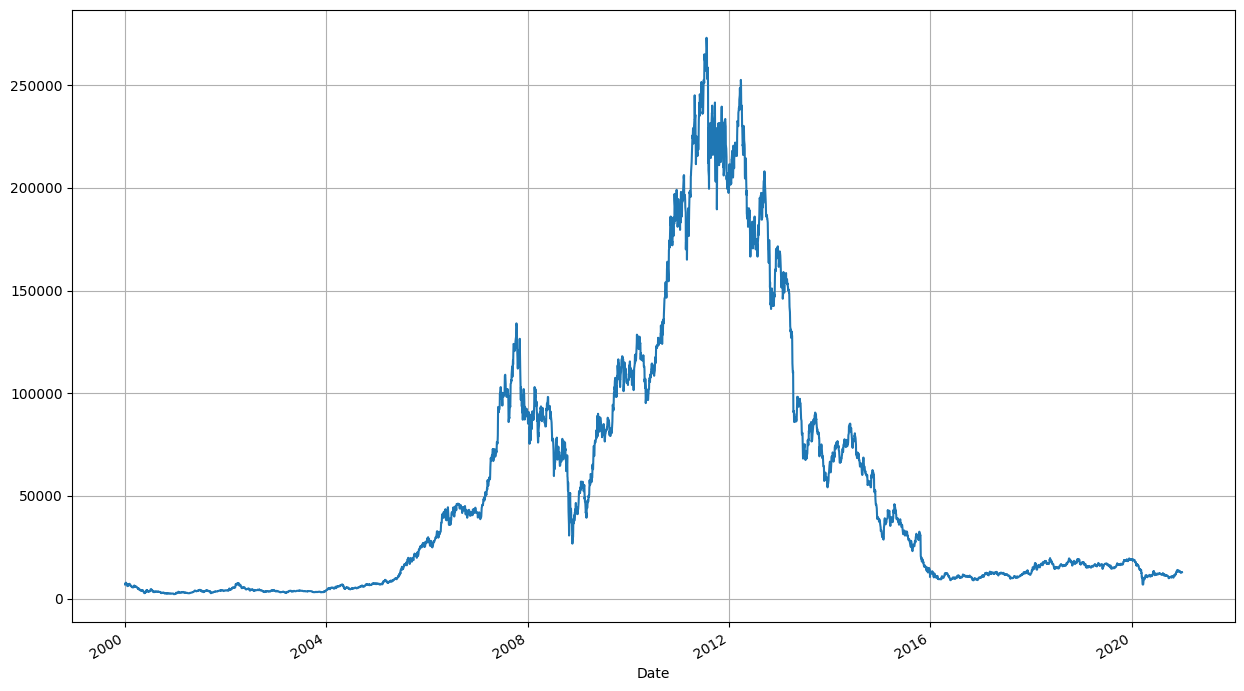

In [70]:
google.Low.plot(grid=True)

In [72]:
display(google.tail())
print(google.isna().sum())

Open     High      Low    Close  Adj Close   Volume
Date                                                              
2020-12-23  12750.0  13100.0  12650.0  12700.0    12700.0  2170749
2020-12-24  13000.0  13300.0  12850.0  13100.0    13100.0  3059784
2020-12-28  13150.0  13200.0  12850.0  12900.0    12900.0  1778299
2020-12-29  12950.0  13150.0  12900.0  12950.0    12950.0  1232173
2020-12-30  13000.0  13250.0  12900.0  13250.0    13250.0  1895179

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [80]:
# Data Preparation

class StockDataset(Dataset):
    def __init__(self, symbol, x_frames, y_frames, start, end):
        self.symbol = symbol
        self.x_frames = x_frames
        self.y_frames = y_frames
        start = datetime.datetime(*start)
        self.start = start.strftime('%Y-%m-%d')
        end = datetime.datetime(*end)
        self.end = end.strftime('%Y-%m-%d')

        self.data = pdr.get_data_yahoo(self.symbol, self.start, self.end)
        display(self.data.head())
        display(self.data.isna().sum())